<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [76]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Time related functions.
import time

#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend
# importing SMOTE
from imblearn.over_sampling import SMOTE


#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report, roc_curve, auc

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [77]:
data = pd.read_csv('./Churn.csv')

## Data Overview

### Displaying the first and last few rows of the dataset

In [78]:
# Display the first few rows of the DataFrame
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [79]:
# Display the last few rows of the DataFrame
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Checking the shape of the dataset

In [80]:
# Display the dimensions of the DataFrame
data.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

### Checking the data types of the columns of the dataset

In [81]:
# Display summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10,000  observations and 14 columns in the data.
* 3 columns are of the object datatype and 11 columns are numerical.

### Checking for duplicate values

In [82]:
# Return the total count of duplicate rows in the DataFrame
data.duplicated().sum()

0

* There are no duplicate rows in the DataFrame

### Checking for Missing Values

In [83]:
# Calculate the percentage of missing values for each column
round(data.isnull().sum() / data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

* There are no null value in the DataFrame

### Checking for unique values

In [84]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [85]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


**Surname:**
* Most Common Surnames:
* Smith: 32 occurrences
* Scott: 29 occurrences
* Martin: 29 occurrences
* Walker: 28 occurrences
* Brown: 26 occurrences
* Least Common Surnames:
* Names such as Izmailov, Bold, Bonham, Poninski, and Burbidge each occur only once.

**Geography:**
* Most Common Locations:
* France: 5,014 occurrences
* Germany: 2,509 occurrences
* Spain: 2,477 occurrences

**Insights:**

* There is a clear geographic concentration, with France having the highest representation in the dataset, followed by Germany and Spain.
* The large number of customers from France indicates that this region is the primary market for the dataset.
* Germany and Spain also have significant, though smaller, customer bases.

**Gender:**
* Counts:
Male: 5,457 occurrences
Female: 4,543 occurrences


### Checking the Statistical Summary

In [86]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**RowNumber**
* count: 10,000 rows, indicating the dataset size.

**CreditScore**
* mean: 650.53, indicating an average credit score of about 650.
* std: 96.65, showing moderate variability in credit scores.
* min: 350, max: 850, with the 25th percentile at 584, the median at 652, and the 75th percentile at 718. This suggests a relatively broad distribution, with most customers having scores between 584 and 718.

**Age**
* mean: 38.92 years, indicating that the average age of customers is around 39.
* std: 10.49 years, suggesting a moderate variation in age.
* min: 18, max: 92, with most customers aged between 32 and 44 years.

**Tenure**
* mean: 5.01 years, indicating the average time customers have been with the company.
* std: 2.89 years, with customers having been with the company for as little as 0 years and as long as 10 years.
The interquartile range (25th percentile: 3 years, 75th percentile: 7 years) indicates that most customers have a tenure between 3 and 7 years.

**Balance**
* mean: $76,485.89, with a std of $62,397.41, suggesting a large spread in account balances.
* min: 0 dollars, max: $250,898.09, the 25th  percentile at 0  dollars and the median at $97,198.54. Many customers have a zero balance, while others have substantial balances, reflecting varied customer financial profiles.

**NumOfProducts**
* mean: 1.53, indicating that customers, on average, use between 1 and 2 products.
* std: 0.58, with the majority of customers using 1 or 2 products (25th percentile: 1, 75th percentile: 2).

**HasCrCard (Has Credit Card)**
* mean: 0.7055, showing that about 70.55% of customers have a credit card.
The min is 0, and the max is 1, reflecting binary data (0 for no credit card, 1 for having one).

**IsActiveMember**
* mean: 0.5151, indicating that about 51.51% of customers are active members.
The std is 0.4998, with min: 0 and max: 1, also indicating binary data (0 for inactive, 1 for active).

**EstimatedSalary**
* mean: $100,090.20, with the std of $57,510.49, showing substantial variability in estimated salaries.
* min: $11.58, max: $199,992.48, suggesting a broad range of customer incomes.

**Exited**
* mean: 0.2037, meaning about 20.37% of customers have left the company.
The min is 0 and the max is 1, indicating this is binary data (0 for staying, 1 for leaving).

**Summary Insights:**
* The dataset consists of 10,000 customers with varied demographics and financial profiles.
* The average customer has been with the company for about 5 years, is about 39 years old, and has a balance of around $76,486.
A significant portion of customers have low or zero balances, use 1 or 2 products, and about 20% have exited.
Most customers have a credit card, and a slightly larger percentage are active members.



In [87]:
data.describe(include=object).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


**Surname:**

Unique Values: 2,932 unique surnames suggest a diverse range of family names among customers.
Top Surname: "Smith" is the most common surname.
Frequency: "Smith" appears 32 times, indicating it is relatively common but not the most frequent surname overall. The dataset includes many different surnames, with the most common one being less frequent compared to the total number of unique surnames.

**Geography:**

Unique Values: There are 3 distinct geographic locations or countries in the dataset.
Top Geography: "France" is the most common location.
Frequency: "France" appears 5,014 times, which is the majority, indicating a significant concentration of customers from France.

**Gender:**

Unique Values: 2 unique values, likely representing "Male" and "Female."
Top Gender: "Male" is the most frequent gender in the dataset.
Frequency: "Male" occurs 5,457 times, showing that males are more prevalent compared to females in this dataset.


### Dropping RowNumber, CustomerId, and Surname

In [88]:
# Removing RowNumber, CustomerId as they have just unique values and surename is like unique identifiers. 
ds = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [89]:
df = ds.copy()
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
df["Exited"].replace(1, "Customer left the bank", inplace=True)
df["Exited"].replace(0, "Customer did not leave the bank", inplace=True)

## Exploratory Data Analysis

**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [90]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [91]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [92]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [93]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

#### Observations on CreditScore

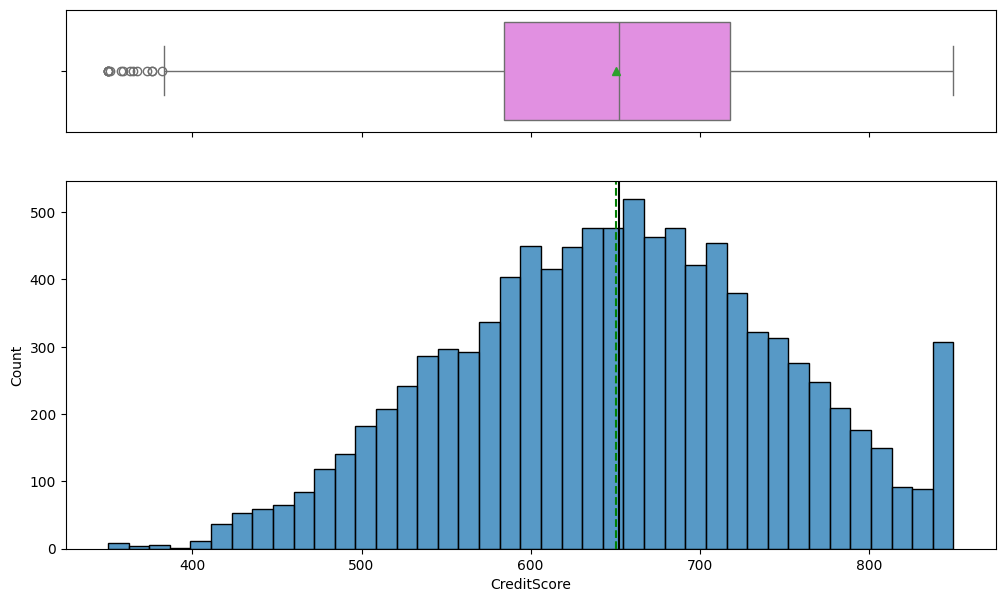

In [94]:
histogram_boxplot(data,'CreditScore')

* There are some left outliers
* The median is around 650
* The distribution is slightly skewed to the left but it has a bell shape


#### Observations on Age

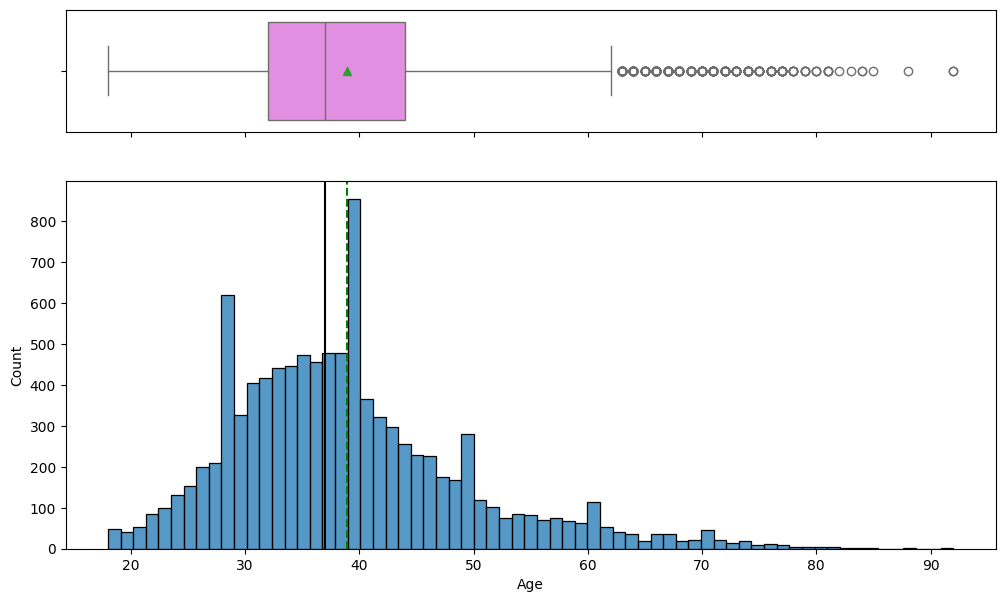

In [95]:
histogram_boxplot(data, 'Age')

* There are some right outliers
* The distribution is right skewed

#### Observations on Balance

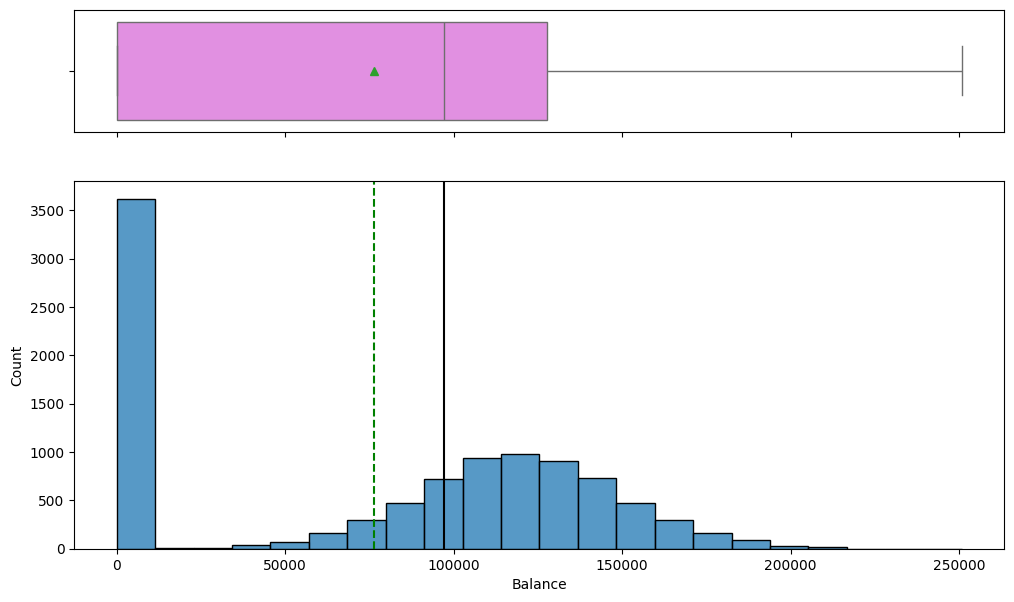

In [96]:
histogram_boxplot(data, 'Balance')

* Many customers has 0$ balance
* There are no outliers


#### Observations on Estimated Salary

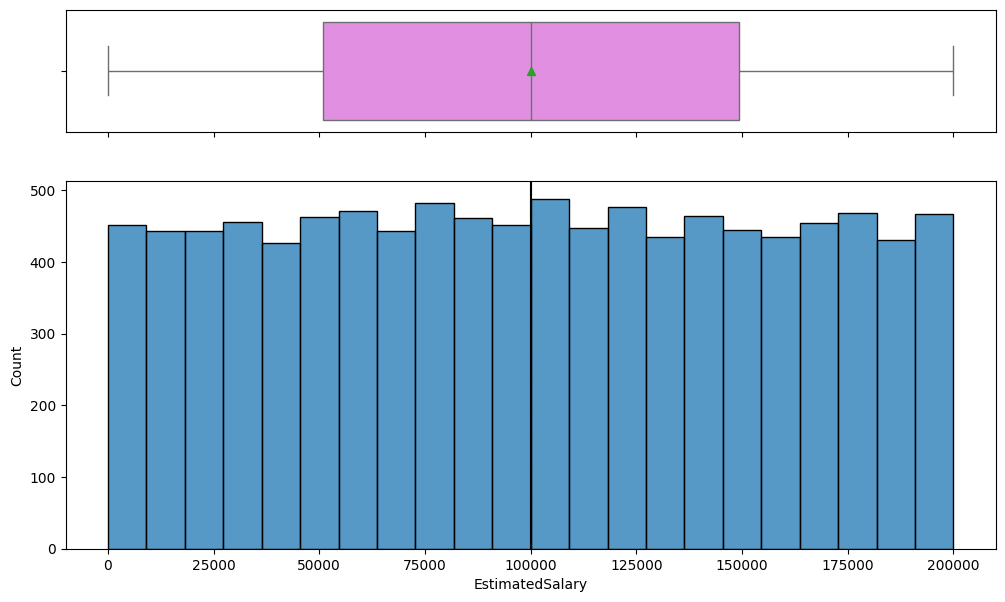

In [97]:
histogram_boxplot(data,'EstimatedSalary')

* There are no outliers

#### Observations on Exited

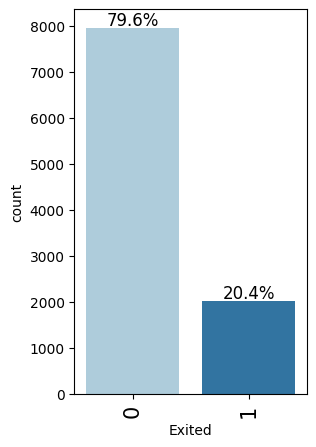

In [98]:
labeled_barplot(ds, "Exited", perc=True)

* 79.6% of customers did not exit and 20.4% of customers exited.

#### Observations on Geography

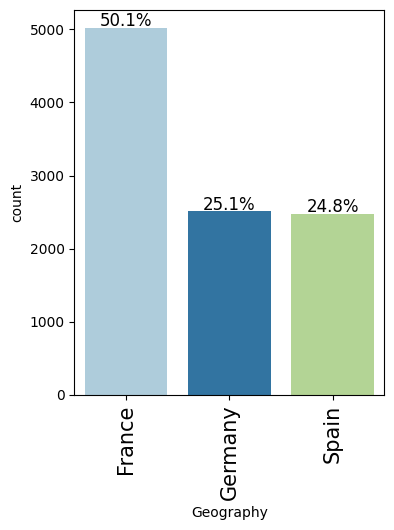

In [99]:
labeled_barplot(data, 'Geography', perc=True)

* 50.1% of customers are from France
* 25.1% of customers are from Germany
* 24.8% of customers are from Spain

#### Observations on Gender

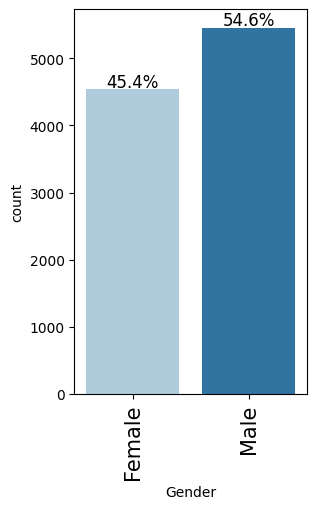

In [100]:
labeled_barplot(data, 'Gender', perc=True)

* 54.6% of customers are males and 45.4% are females

#### Observations on Tenure

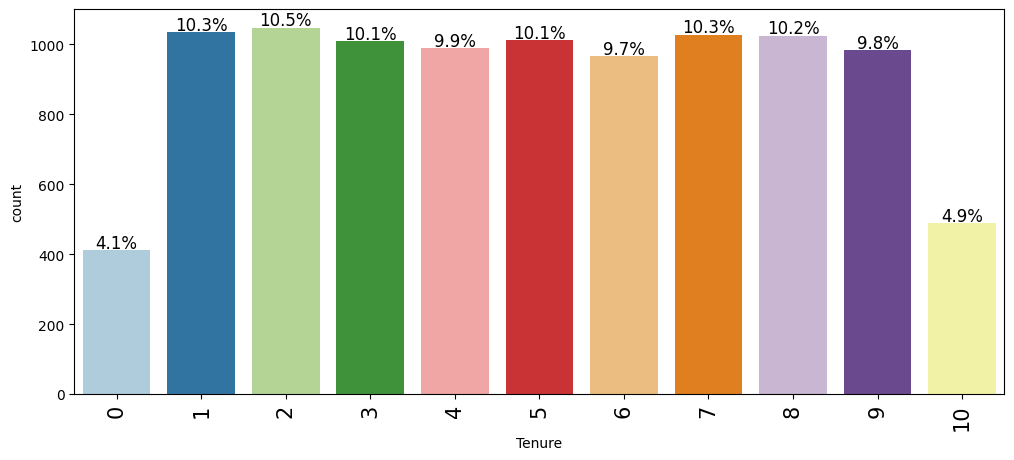

In [101]:
labeled_barplot(data, 'Tenure', perc=True)

In [102]:
# Return Tenure more than 5
(data[data['Tenure']>=5]['Tenure'].value_counts()/ data['Tenure'].count() * 100).sum()

55.059999999999995

* Around 55% of customers are with bank more than 5 years

#### Observations on Number of Products

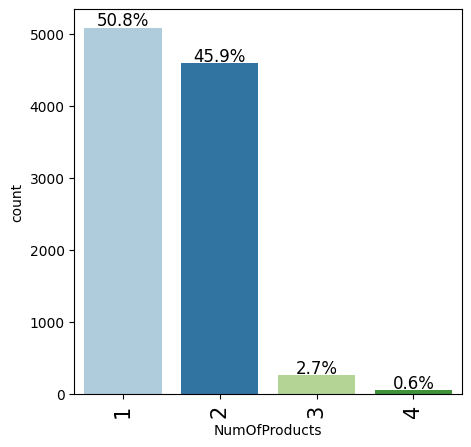

In [103]:
labeled_barplot(data, 'NumOfProducts', perc=True)

* Around 51% of customers have only one product

#### Observations on Has Credit Card

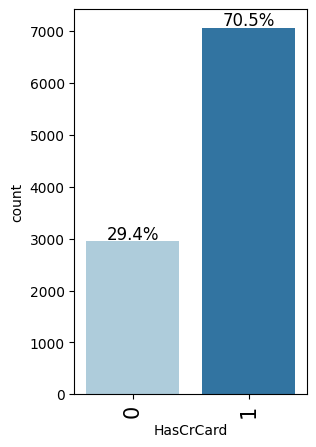

In [104]:
labeled_barplot(data, 'HasCrCard', perc=True)

* 70.5% of customers have creadit card

#### Observations on Is Active Member

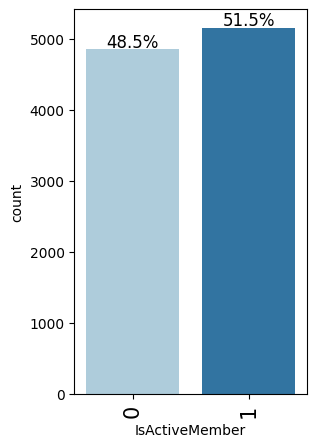

In [105]:
labeled_barplot(data, 'IsActiveMember', perc=True)

* 51.5% of customers are active
* 48.5% of customers are not active customers, they don't use bank products regularly, making transactions, etc

### Bivariate Analysis

#### Correlation plot

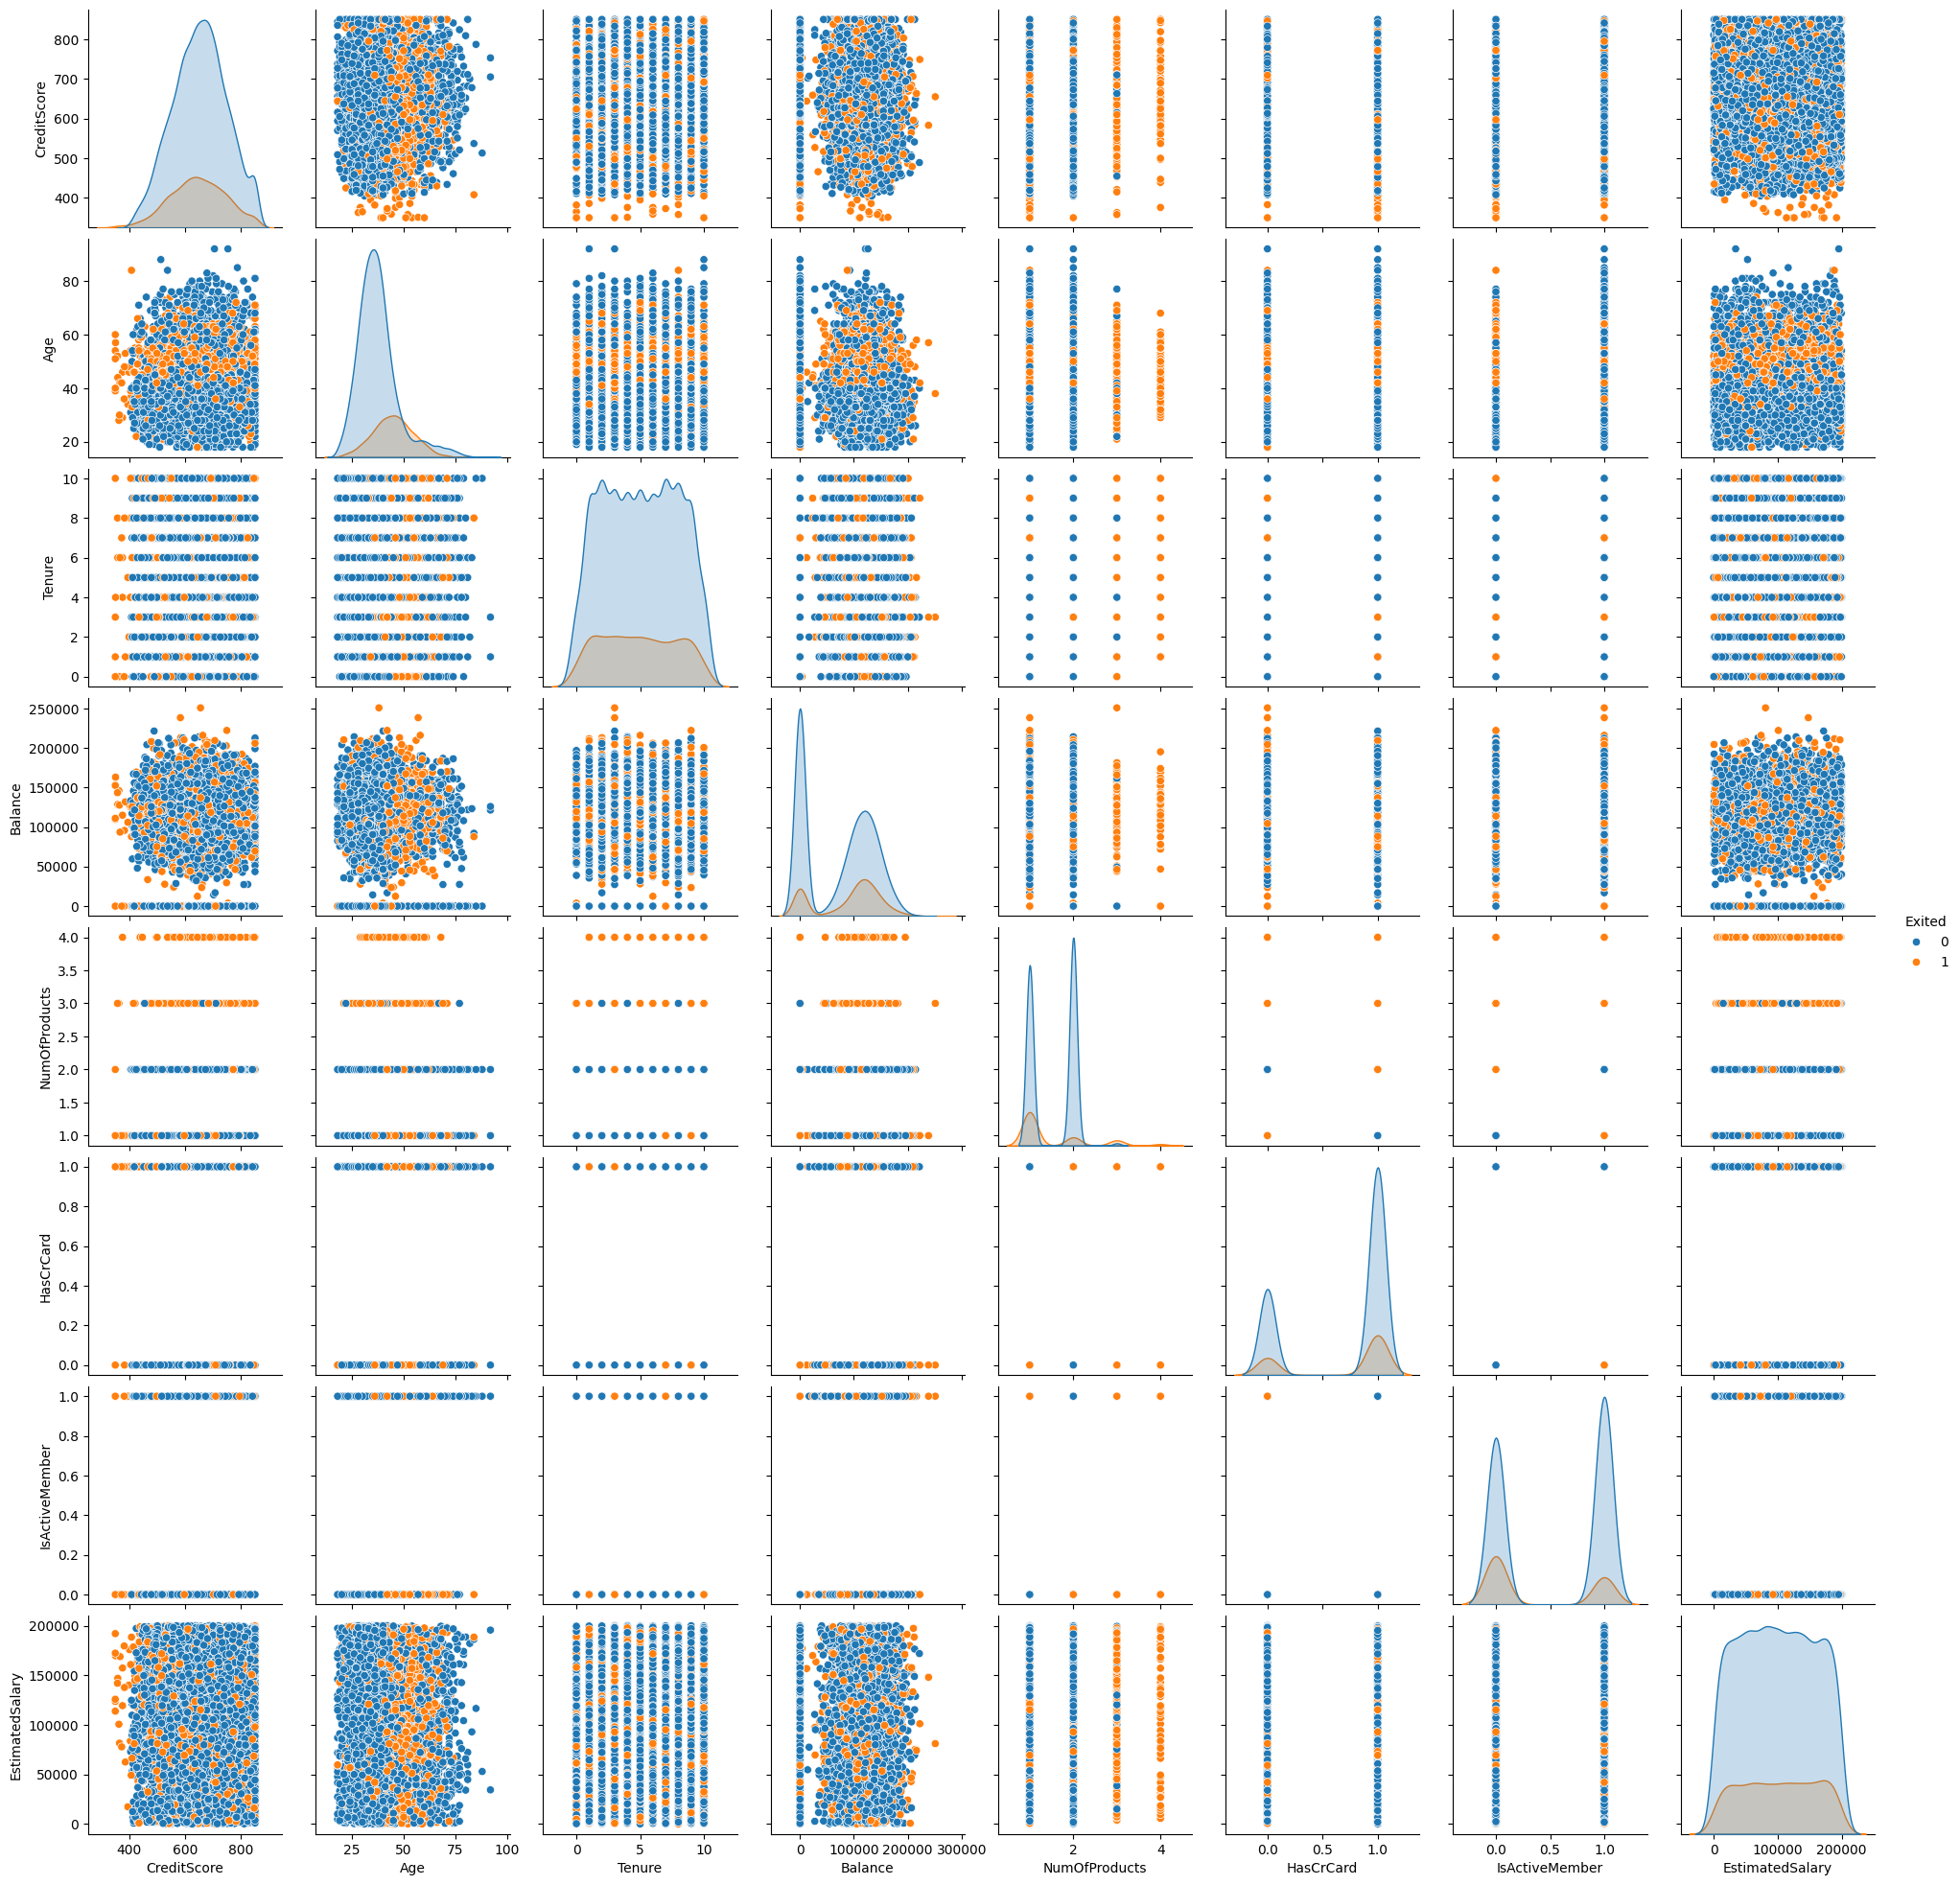

In [106]:
sns.pairplot(ds, diag_kind = 'kde', hue = 'Exited')
plt.show()

In [107]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

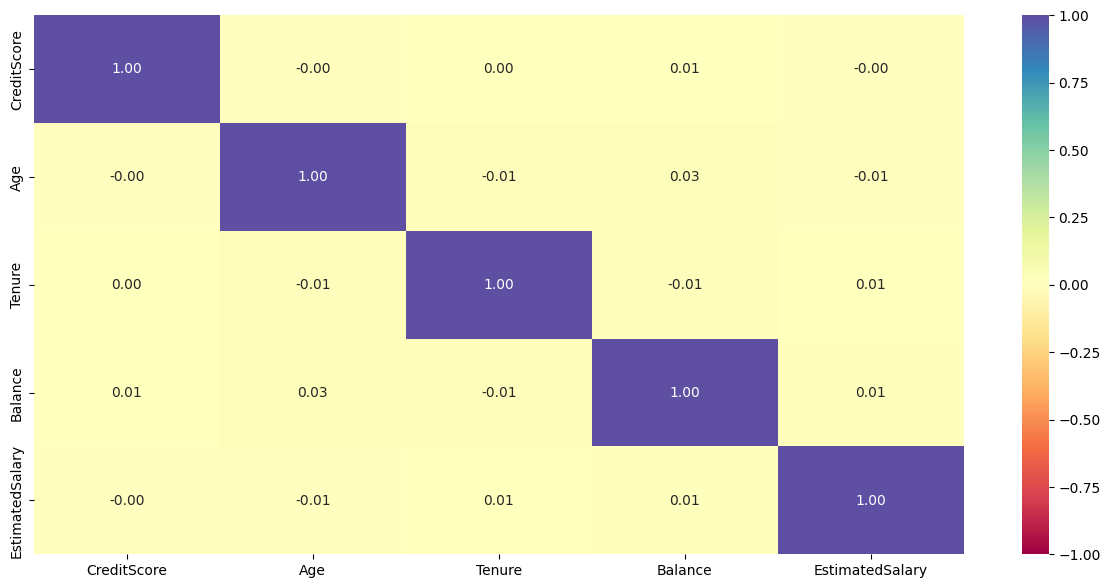

In [108]:
plt.figure(figsize=(15, 7))
sns.heatmap(data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()


**Low Correlation Among Variables:**
The correlation coefficients between most variables are close to 0, indicating weak linear relationships.
For example, CreditScore and Balance have a correlation of 0.01, which is very low.

Age and Balance:
There is a slight positive correlation (0.03) between Age and Balance, but it's still quite weak.


**Overall Insights:**
The pair plot shows some trends where Age, Balance, and NumOfProducts may have an impact on the likelihood of a customer exiting, although the relationships are not very strong.The heatmap indicates that the features are not highly linearly related to each other.

#### Exited Vs Geography

Exited     Customer did not leave the bank  Customer left the bank    All
Geography                                                                
All                                   7963                    2037  10000
Germany                               1695                     814   2509
France                                4204                     810   5014
Spain                                 2064                     413   2477
------------------------------------------------------------------------------------------------------------------------


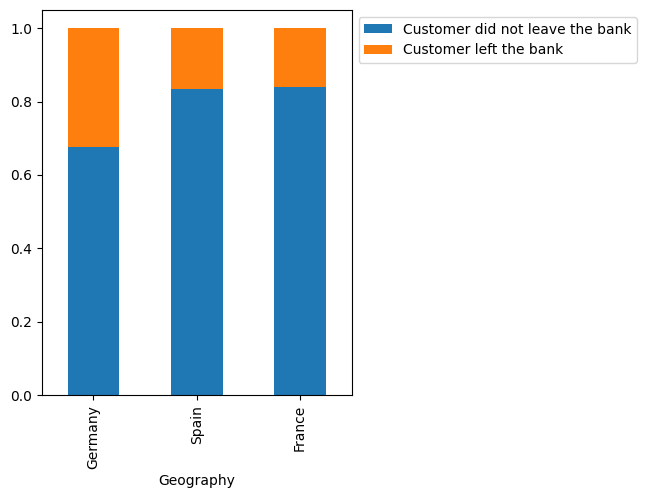

In [109]:
stacked_barplot(df, "Geography", "Exited" )

* The ration of exiting the bank in German customers is higher than the French and Spanish customers


#### Exited Vs Gender

Exited  Customer did not leave the bank  Customer left the bank    All
Gender                                                                
All                                7963                    2037  10000
Female                             3404                    1139   4543
Male                               4559                     898   5457
------------------------------------------------------------------------------------------------------------------------


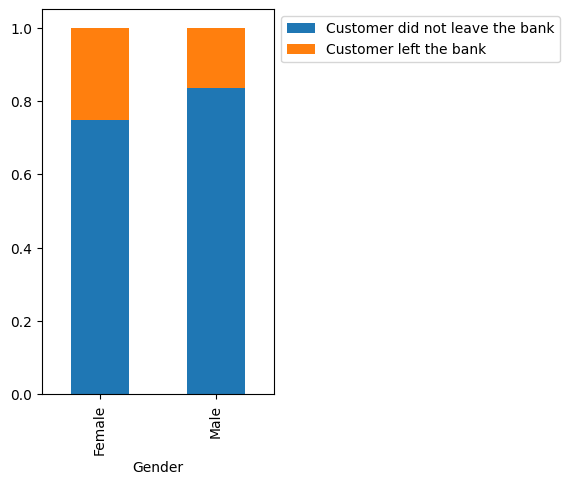

In [110]:
stacked_barplot(df, "Gender", "Exited" )

* Female customers more exit the bank comape to the males.

#### Exited Vs Has Credit Card

Exited     Customer did not leave the bank  Customer left the bank    All
HasCrCard                                                                
All                                   7963                    2037  10000
1                                     5631                    1424   7055
0                                     2332                     613   2945
------------------------------------------------------------------------------------------------------------------------


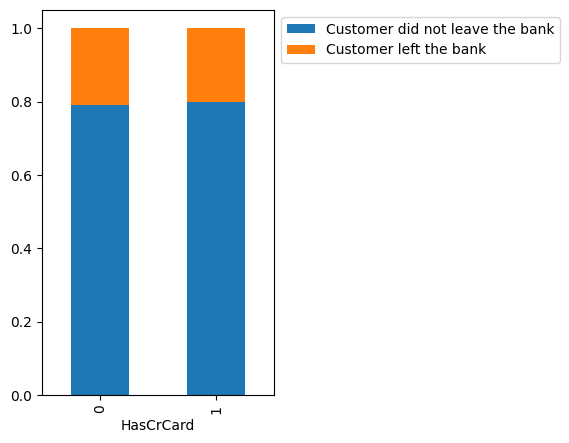

In [111]:
stacked_barplot(df, "HasCrCard", "Exited" )

* Seems customers with the credit card and without credit card has the same ratio to exit the bank.

#### Exited Vs Is active member

Exited          Customer did not leave the bank  Customer left the bank    All
IsActiveMember                                                                
All                                        7963                    2037  10000
0                                          3547                    1302   4849
1                                          4416                     735   5151
------------------------------------------------------------------------------------------------------------------------


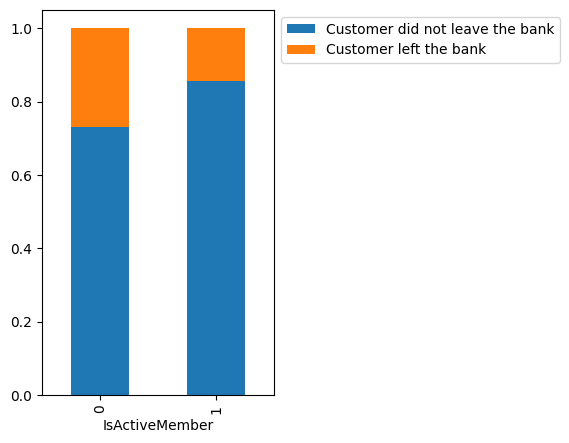

In [112]:
stacked_barplot(df, 'IsActiveMember', 'Exited')

* Not active customers more exit the bank

#### Exited Vs Credit Score

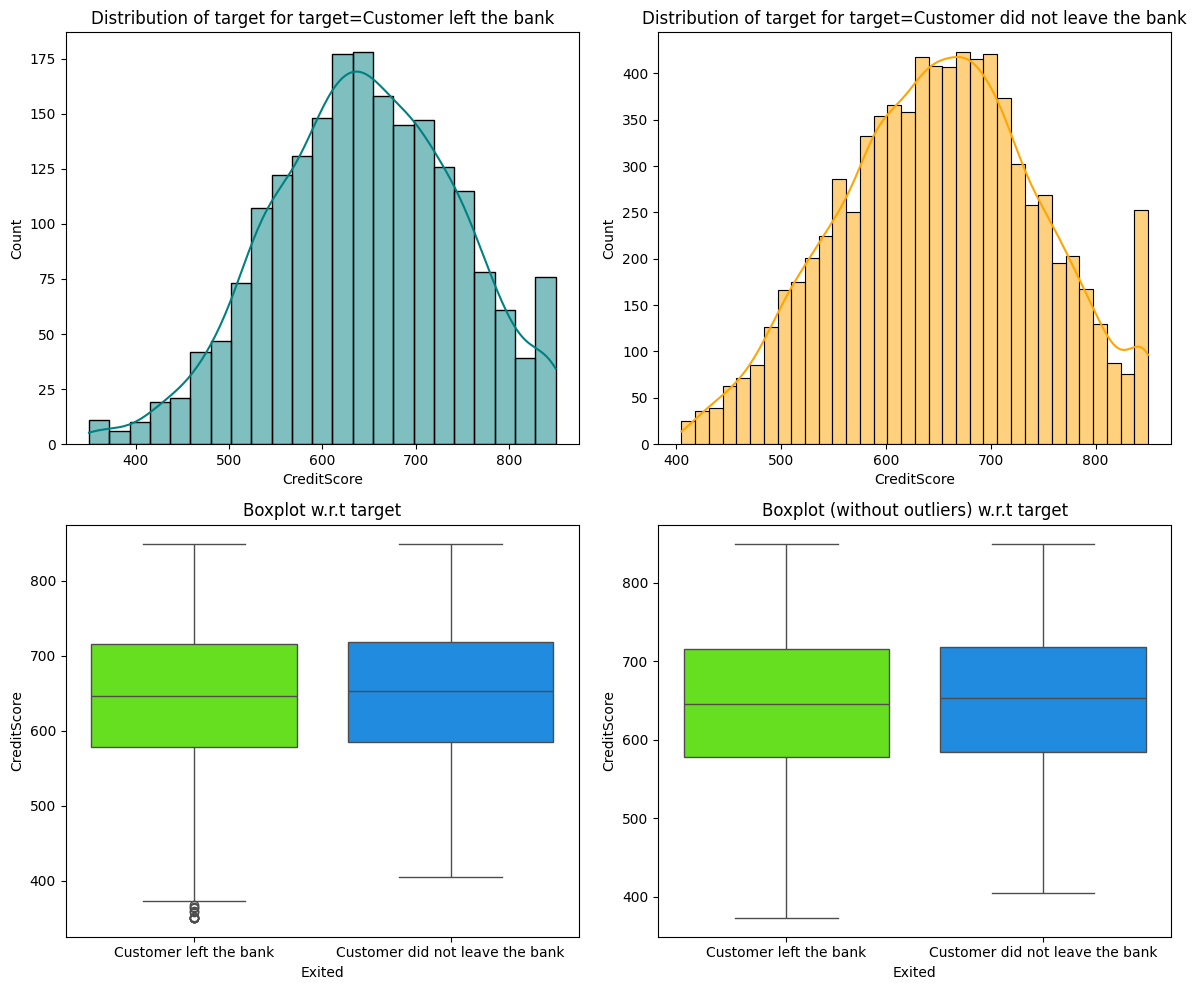

In [113]:
distribution_plot_wrt_target(df, 'CreditScore', 'Exited')

* There are some low outliers in the Customers who left the bank
* The Median is the same in both

#### Exited Vs Age

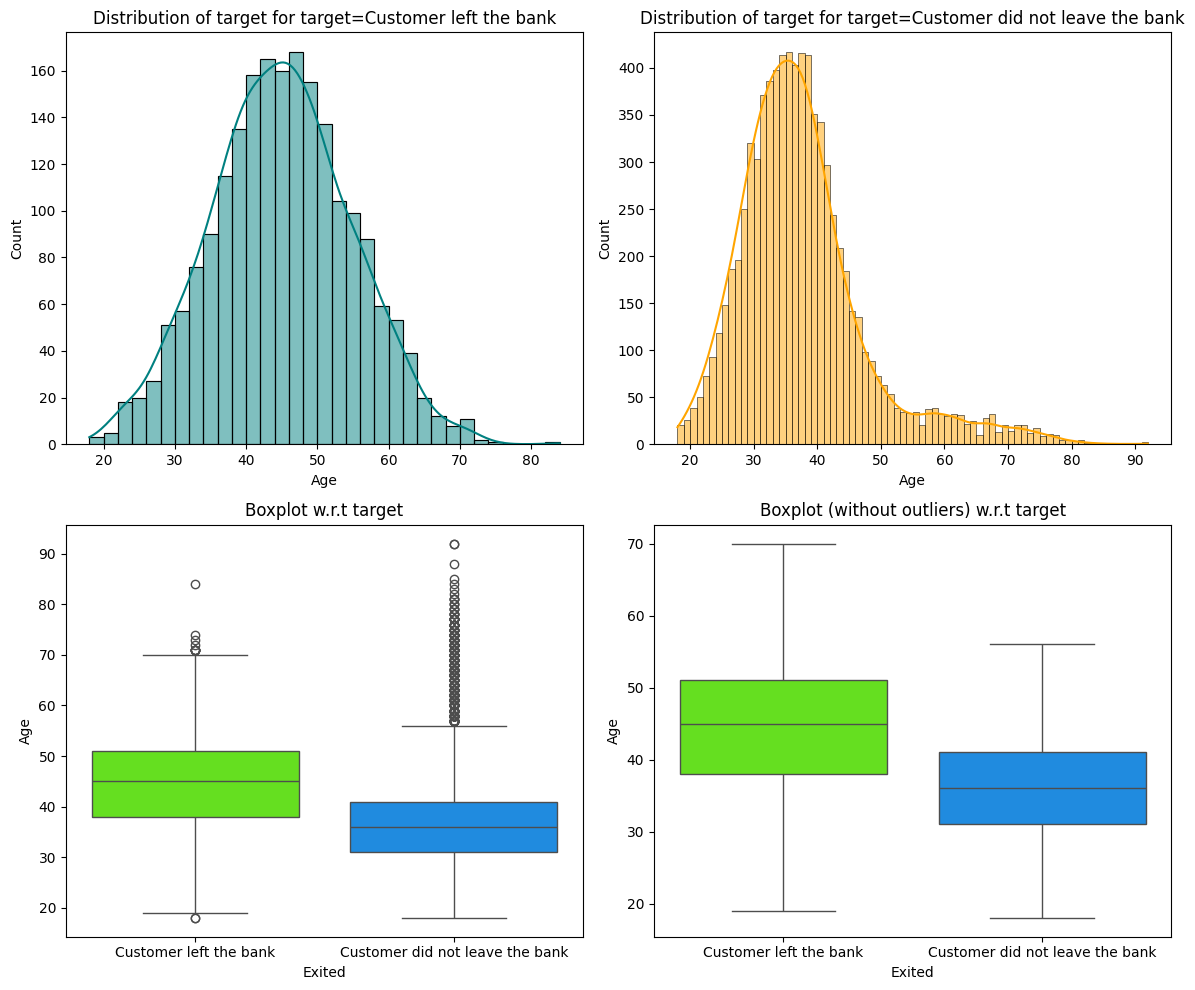

In [114]:
distribution_plot_wrt_target(df, 'Age', 'Exited')

* There are some outliers in both groups
* Seems customers did not left the bank are younger


#### Exited Vs Tenure

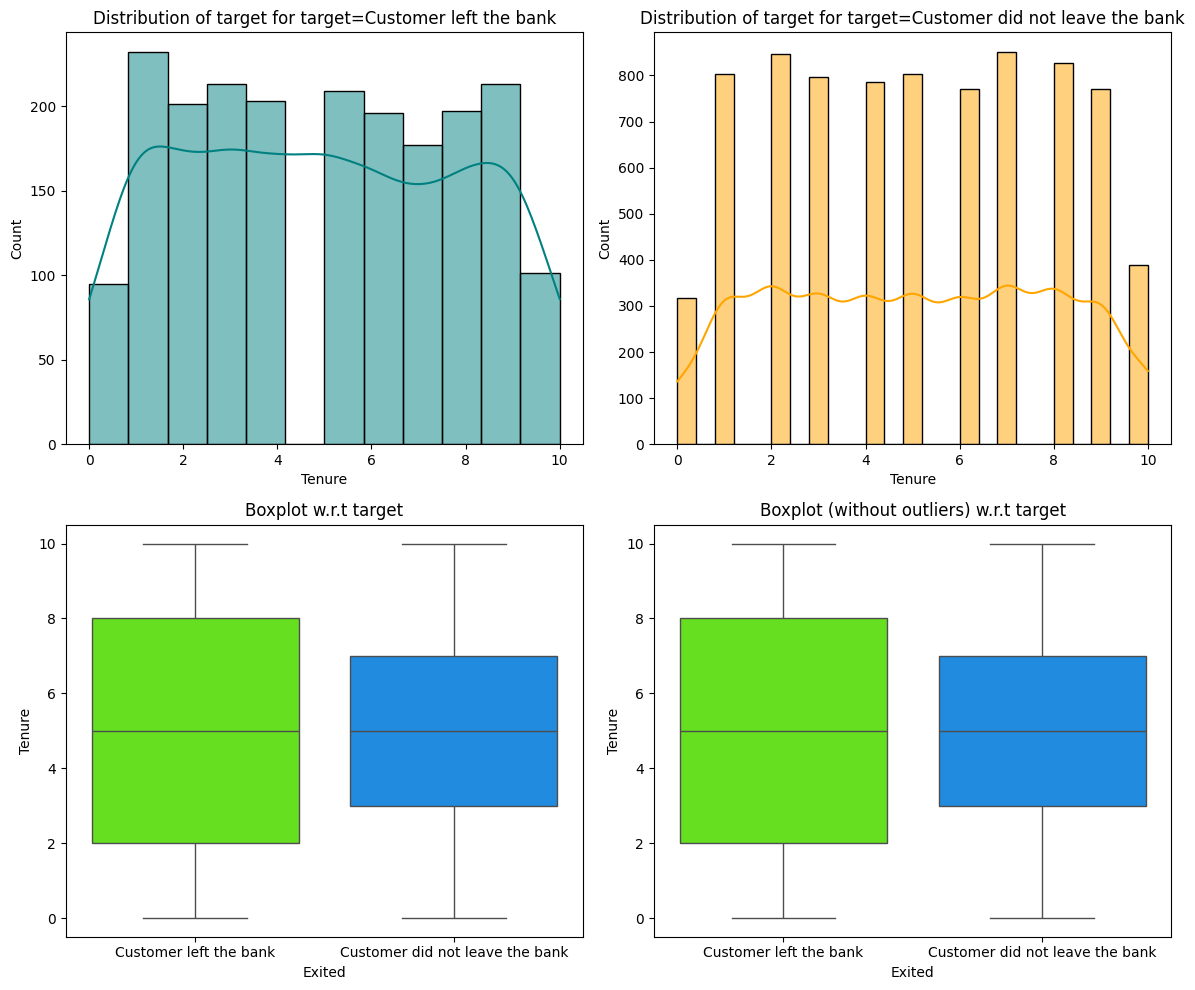

In [115]:
distribution_plot_wrt_target(df, 'Tenure', 'Exited')


* There no outliers
* The median in both groups is the same

#### Exited Vs Balance

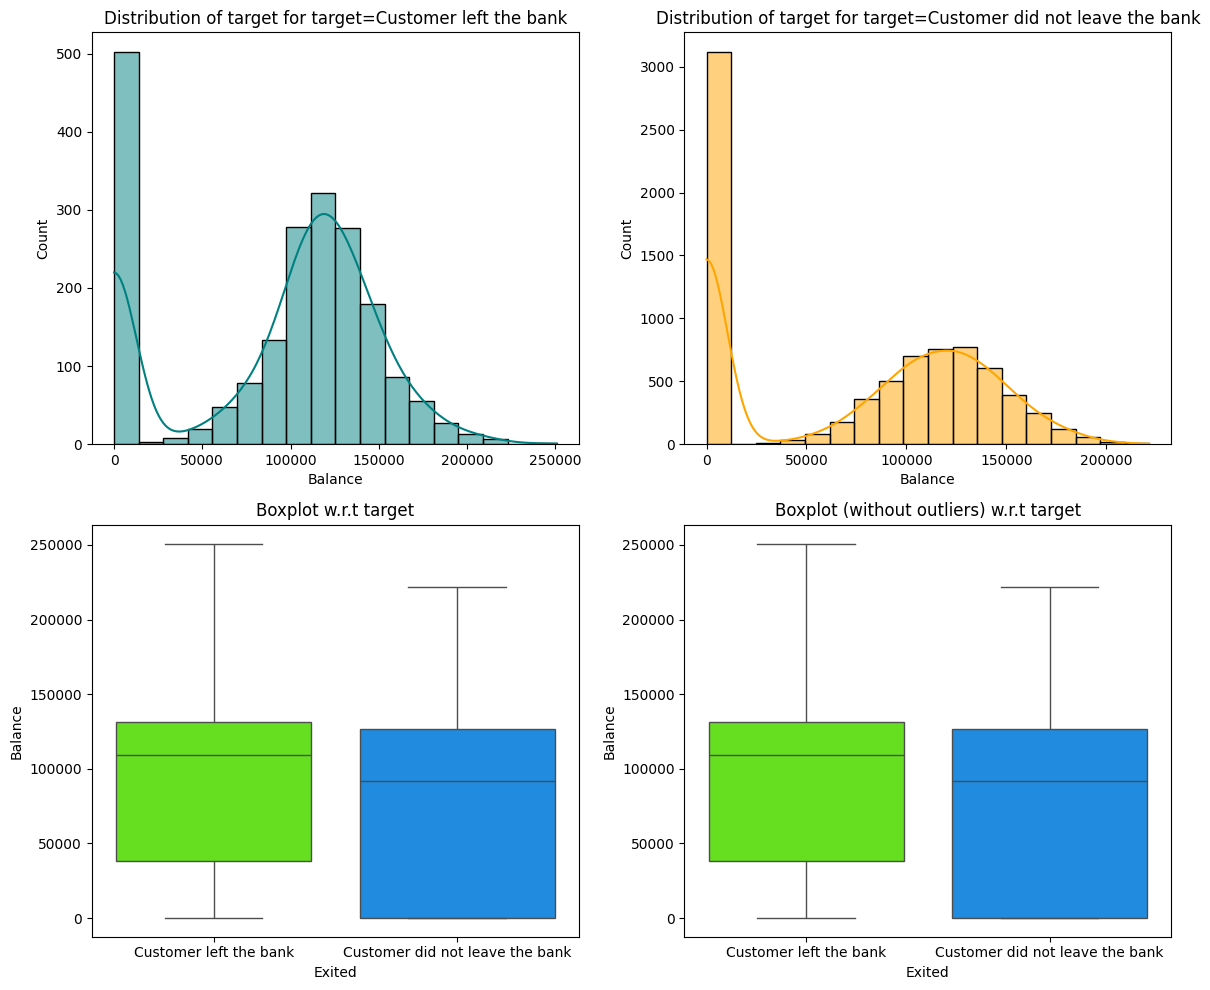

In [116]:
distribution_plot_wrt_target(df, 'Balance', 'Exited')

* There are no outliers
* The median in customers left is higher than those did not left.
* Seems not exited customers have less balance

#### Exited Vs Number of Products

Exited         Customer did not leave the bank  Customer left the bank    All
NumOfProducts                                                                
All                                       7963                    2037  10000
1                                         3675                    1409   5084
2                                         4242                     348   4590
3                                           46                     220    266
4                                            0                      60     60
------------------------------------------------------------------------------------------------------------------------


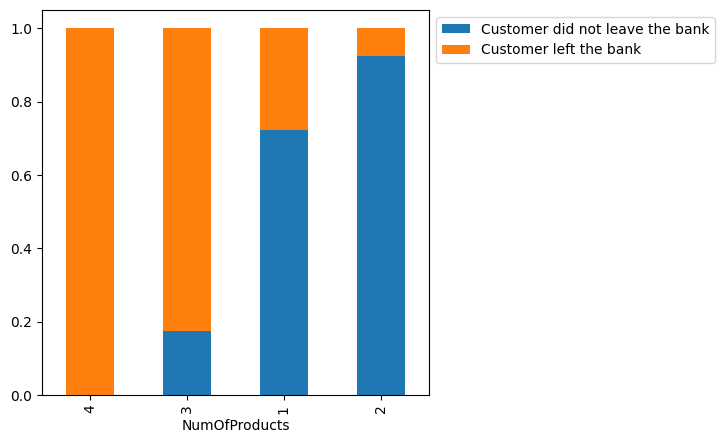

In [117]:
stacked_barplot(df, "NumOfProducts", "Exited")

* seems customers with 3 and 4 products more left the bank.

#### Exited Vs Estimated Salary

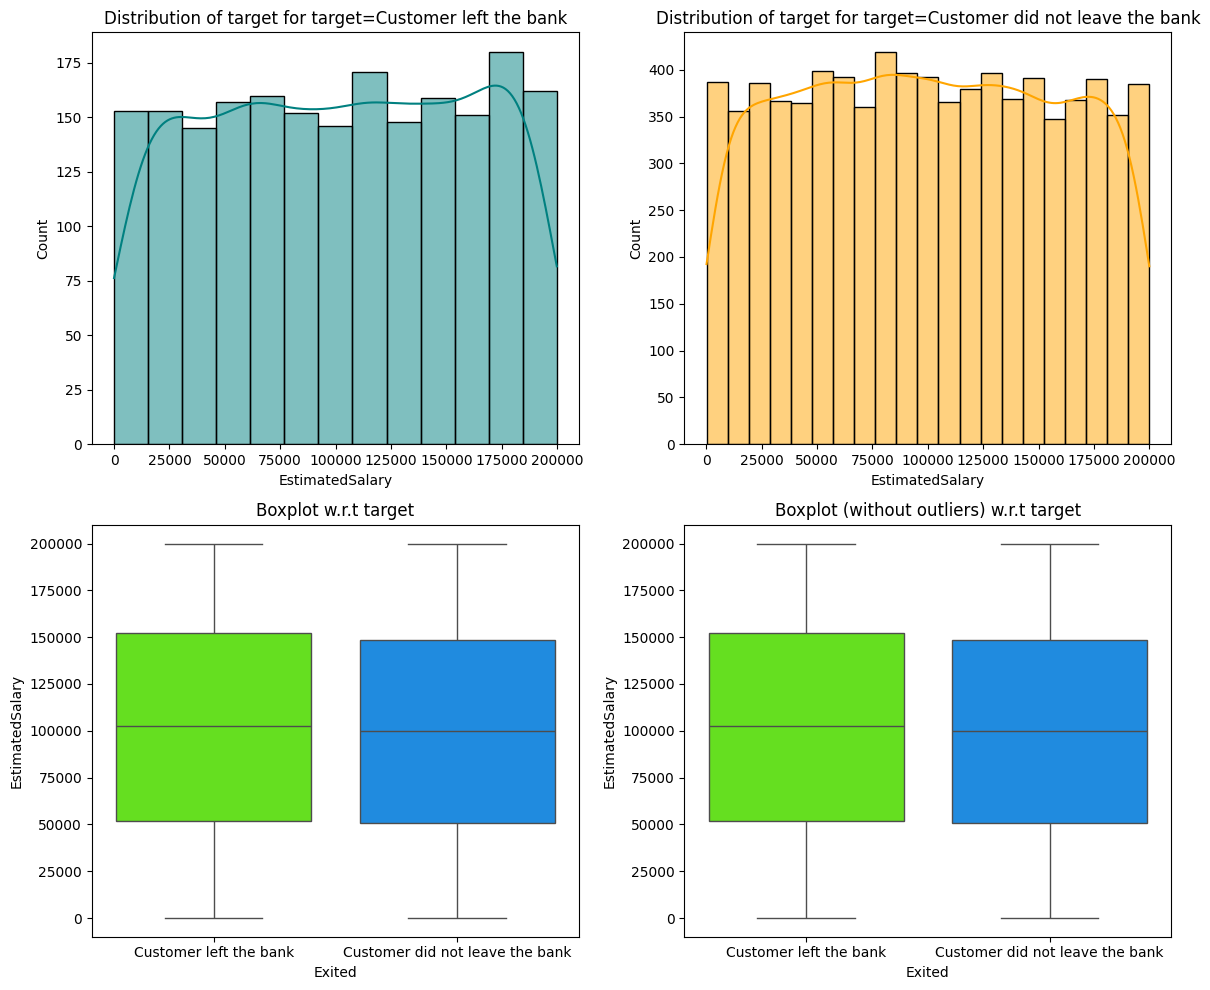

In [118]:
distribution_plot_wrt_target(df, 'EstimatedSalary', 'Exited')

* Seems thers in no different in salay between both groups.

## Data Preprocessing

### Dummy Variable Creation

In [119]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [120]:
df.shape

(10000, 11)

In [121]:
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True,dtype=float)

In [122]:
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,1,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.0,1.0,0.0


In [123]:
df.shape

(10000, 11)

In [124]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

* After encoding there are 11 columns.

### Train-validation-test Split

In [125]:
X = ds.drop(['Exited'],axis=1)
y = ds['Exited']

In [126]:
X.isnull().sum()

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

In [127]:
y.isnull().sum()

0

* No null value in X and y

In [128]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42,stratify = y)

In [129]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

- There are no missing values in the columns.

In [130]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(6400, 11) (6400,)
(1600, 11) (1600,)
(2000, 11) (2000,)


In [131]:
# Checking the shape
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(6400, 11)
(1600, 11)
(6400,)
(1600,)
(2000, 11)
(2000,)


### Data Normalization

In [132]:
# creating an instance of the standard scaler
standardScacler = StandardScaler()

X_train[cols_list] = standardScacler.fit_transform(X_train[cols_list])
X_valid[cols_list] = standardScacler.transform(X_valid[cols_list])
X_test[cols_list] = standardScacler.transform(X_test[cols_list])

### Utility functions

In [133]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [134]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [135]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

We'll create a dataframe to store the results from all the models we build

In [136]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer ","# epochs","batch size","optimizer","learning rate, momentum","weight initializer","regularization","train loss","validation loss","train Recall","validation Recall","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

In [137]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

## Model Building

### Model Evaluation Criterion

Write down the logic for choosing the metric that would be the best metric for this business scenario.


**A model can make wrong predictions in the following ways:**
* Predicting a customer is exiting  and the customer  is not exiting
* Predicting a customer is not exiting and  customer is  exiting

**Which case is more important?**
* Predicting that customer is not exiting but they exit. It might cause loss to the banks.

**How to reduce this loss i.e need to reduce False Negative?**
* Bank would want `Recall` to be maximized, greater the Recall higher the chances of minimizing false Negative. Hence, the focus should be on increasing Recall or minimizing the false Negative.


* Setting epochs and batch_size to use in training

In [138]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

### Neural Network with SGD Optimizer

In [139]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

np.random.seed(42)

random.seed(42)
tf.random.set_seed(42)

In [140]:

#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Adding a hidden layer with 32 neurons and relu as activation function
model_0.add(Dense(32, activation='relu'))
# Adding the output layer with the number of neurons required (assuming binary classification)
model_0.add(Dense(1, activation = 'sigmoid'))

In [141]:
# Create an SGD optimizer with a learning rate of 0.001
optimizer = tf.keras.optimizers.SGD(0.001)

In [142]:
# Compile the model with binary crossentropy loss, SGD optimizer, accuracy as a metric
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [143]:
# Print a summary of the model's architecture, including layer types, output shapes, and the number of parameters
model_0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [144]:
# Record the current time before training starts
start = time.time()
# Train the model on the training data (X_train, y_train) with validation on (X_valid, y_valid)
# The training process runs for the specified number of epochs with a defined batch size.
history_0 = model_0.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=epochs)
# Record the time after training ends
end = time.time()


Epoch 1/25
100/100 [==============================] - 0s 1ms/step - loss: 0.6107 - accuracy: 0.7250 - val_loss: 0.5945 - val_accuracy: 0.7638
Epoch 2/25
100/100 [==============================] - 0s 442us/step - loss: 0.5865 - accuracy: 0.7609 - val_loss: 0.5732 - val_accuracy: 0.7794
Epoch 3/25
100/100 [==============================] - 0s 444us/step - loss: 0.5678 - accuracy: 0.7802 - val_loss: 0.5568 - val_accuracy: 0.7856
Epoch 4/25
100/100 [==============================] - 0s 434us/step - loss: 0.5533 - accuracy: 0.7881 - val_loss: 0.5440 - val_accuracy: 0.7931
Epoch 5/25
100/100 [==============================] - 0s 427us/step - loss: 0.5420 - accuracy: 0.7928 - val_loss: 0.5339 - val_accuracy: 0.7975
Epoch 6/25
100/100 [==============================] - 0s 422us/step - loss: 0.5330 - accuracy: 0.7947 - val_loss: 0.5258 - val_accuracy: 0.7969
Epoch 7/25
100/100 [==============================] - 0s 426us/step - loss: 0.5258 - accuracy: 0.7961 - val_loss: 0.5192 - val_accuracy: 0

In [145]:
# Calculate and print the total time taken for training by subtracting start time from end time
print("Time taken in seconds ",end-start)

Time taken in seconds  1.2980101108551025


**Loss function**

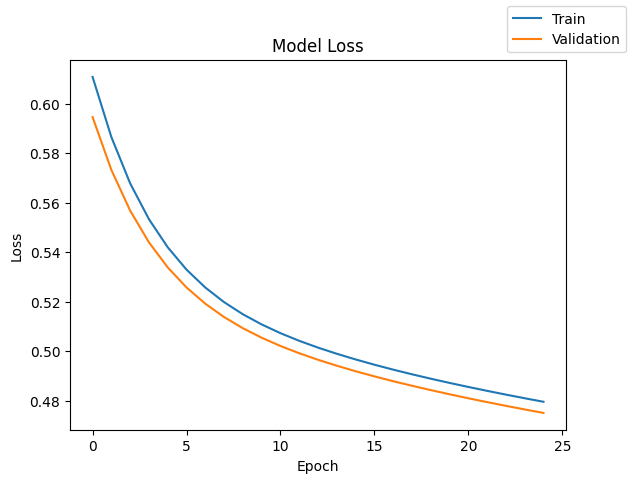

In [146]:
#Plotting Train Loss vs Validation Loss
plot(history_0,'loss')

**Finding the best threshold**

* The G-Mean is the geometric mean of sensitivity (recall) and specificity.
* Maximizing the geometric mean is equivalent to finding a good balance between TPR and TNR. The
following code block calculates the best threshold for classification using the G-mean metric, along with
its corresponding TPR, FPR, and TNR values.
* This metric seeks a balance between correctly classifying the positive class while not misclassifying too many negatives.

In [147]:
y_pred = model_0.predict(X_train)
y_pred

200/200 [==============================] - 0s 271us/step


array([[0.25197175],
       [0.18951592],
       [0.20756295],
       ...,
       [0.14825074],
       [0.2871508 ],
       [0.19324312]], dtype=float32)

In [148]:
# predict probabilities
y_pred = model_0.predict(X_train)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

youden_index = tpr - fpr
max_youden_index = np.argmax(youden_index)

gmean = np.sqrt(tpr*(1-fpr))
max_gmean_index = np.argmax(gmean)
best_thresh = thresholds[max_gmean_index]
print('Best threshold using G-mean=%f'% (best_thresh))
print('Max G-mean value=%f'% (gmean[max_gmean_index]))
print("TPR value at the threshold=%f" % tpr[max_gmean_index])
print("FPR value at the threshold=%f" % fpr[max_gmean_index])
print("TNR value at the threshold=%f" % (1 - fpr[max_youden_index]))

200/200 [==============================] - 0s 295us/step
Best threshold using G-mean=0.230532
Max G-mean value=0.635084
TPR value at the threshold=0.596626
FPR value at the threshold=0.323980
TNR value at the threshold=0.676020


**Model_0 predecting by using the best threshold**

In [149]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > best_thresh)
y_train_pred

200/200 [==============================] - 0s 271us/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [150]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_valid)
y_val_pred = (y_val_pred > best_thresh)
y_val_pred

50/50 [==============================] - 0s 333us/step


array([[ True],
       [False],
       [ True],
       ...,
       [False],
       [ True],
       [False]])

**Metrics**

In [151]:
model_name = "NN with SGD"

# Store the recall score on the training data in the train_metric_df DataFrame under the model's name
train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
# Store the recall score on the validation data in the valid_metric_df DataFrame under the model's name
valid_metric_df.loc[model_name] = recall_score(y_valid, y_val_pred)

**Classification report**

In [152]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.68      0.76      5096
           1       0.32      0.60      0.42      1304

    accuracy                           0.66      6400
   macro avg       0.59      0.64      0.59      6400
weighted avg       0.76      0.66      0.69      6400



In [153]:
#classification report
cr=classification_report(y_valid, y_val_pred) 
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.68      0.76      1274
           1       0.31      0.57      0.41       326

    accuracy                           0.66      1600
   macro avg       0.59      0.63      0.58      1600
weighted avg       0.75      0.66      0.69      1600



**Confusion matrix**

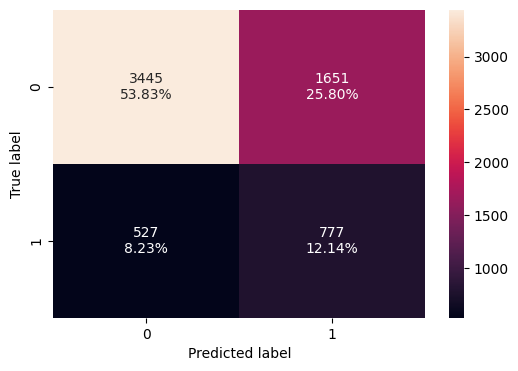

In [154]:
make_confusion_matrix(y_train, y_train_pred)

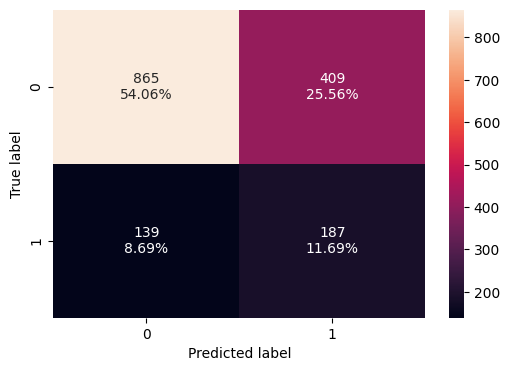

In [155]:
make_confusion_matrix(y_valid, y_val_pred)

**Model_0:**

* The model shows signs of underfitting. Recall on training is ~60% and on validation is ~57%.

* suggesting the model is not complex enough to capture the patterns in the data.

* The validation loss is not significantly higher than the training loss.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [156]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [157]:
#Initializing the neural network
model_1 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_1.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Adding a hidden layer with 32 neurons and relu as activation function
model_1.add(Dense(32, activation='relu'))
# Adding the output layer with the number of neurons required (assuming binary classification)
model_1.add(Dense(1, activation = 'sigmoid'))

In [158]:
# Initialize the Adam optimizer with a learning rate of 0.001 for model training
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [159]:
# Compile the model with binary crossentropy loss, Adam optimizer, and accuracy as a metric
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [160]:
# Print a summary of the model's architecture, including layer details, output shapes, and parameter counts
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [161]:
# Record the current time before training starts
start = time.time()
# Train the model on the training data (X_train, y_train) with validation on (X_valid, y_valid)
# Training runs for the specified number of epochs with a defined batch size. 'verbose=1' displays progress during training.
history_1 = model_1.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=epochs, verbose=1)
# Record the time after training ends
end=time.time()

Epoch 1/25
100/100 [==============================] - 0s 1ms/step - loss: 0.4688 - accuracy: 0.7944 - val_loss: 0.4357 - val_accuracy: 0.8044
Epoch 2/25
100/100 [==============================] - 0s 471us/step - loss: 0.4182 - accuracy: 0.8202 - val_loss: 0.4269 - val_accuracy: 0.8163
Epoch 3/25
100/100 [==============================] - 0s 466us/step - loss: 0.4062 - accuracy: 0.8264 - val_loss: 0.4161 - val_accuracy: 0.8250
Epoch 4/25
100/100 [==============================] - 0s 474us/step - loss: 0.3971 - accuracy: 0.8319 - val_loss: 0.4120 - val_accuracy: 0.8369
Epoch 5/25
100/100 [==============================] - 0s 457us/step - loss: 0.3887 - accuracy: 0.8345 - val_loss: 0.4048 - val_accuracy: 0.8313
Epoch 6/25
100/100 [==============================] - 0s 449us/step - loss: 0.3806 - accuracy: 0.8395 - val_loss: 0.3970 - val_accuracy: 0.8413
Epoch 7/25
100/100 [==============================] - 0s 450us/step - loss: 0.3732 - accuracy: 0.8417 - val_loss: 0.3933 - val_accuracy: 0

In [162]:
# Calculate and print the total time taken for training by subtracting the start time from the end time
print("Time taken in seconds", end - start)

Time taken in seconds 1.4499351978302002


**Loss function**

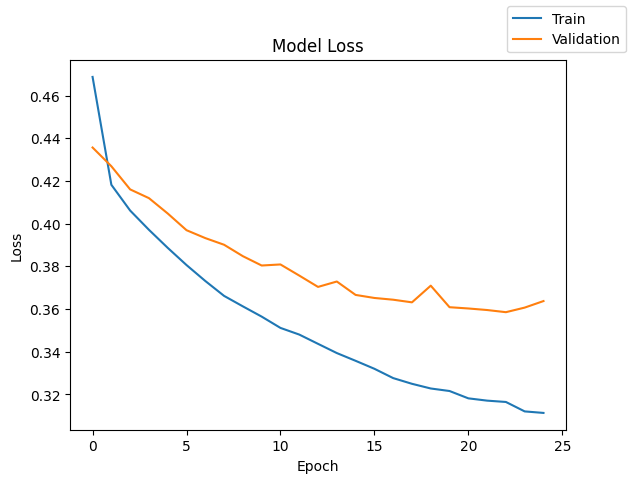

In [163]:
#Plotting Train Loss vs Validation Loss
plot(history_1,'loss')

**Finding the best threshold**

In [164]:
# predict probabilities
y_pred = model_1.predict(X_train)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

youden_index = tpr - fpr
max_youden_index = np.argmax(youden_index)

gmean = np.sqrt(tpr*(1-fpr))
max_gmean_index = np.argmax(gmean)
best_thresh = thresholds[max_gmean_index]
print('Best threshold using G-mean=%f'% (best_thresh))
print('Max G-mean value=%f'% (gmean[max_gmean_index]))
print("TPR value at the threshold=%f" % tpr[max_gmean_index])
print("FPR value at the threshold=%f" % fpr[max_gmean_index])
print("TNR value at the threshold=%f" % (1 - fpr[max_youden_index]))

200/200 [==============================] - 0s 276us/step
Best threshold using G-mean=0.180119
Max G-mean value=0.810069
TPR value at the threshold=0.819018
FPR value at the threshold=0.198783
TNR value at the threshold=0.801217


**Model_0 predecting by using the best threshold**

In [165]:
#Predicting the results using best threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > best_thresh)
y_train_pred

200/200 [==============================] - 0s 251us/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [166]:
#Predicting the results using best threshold
y_val_pred = model_1.predict(X_valid)
y_val_pred = (y_val_pred > best_thresh)
y_val_pred

50/50 [==============================] - 0s 279us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [167]:
# Store recall scores for the model named "NN with Adam" in the train and validation metric DataFrames
model_name = "NN with Adam"

# Store the recall score on the training data in the train_metric_df DataFrame under the model's name
train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
# Store the recall score on the validation data in the valid_metric_df DataFrame under the model's name
valid_metric_df.loc[model_name] = recall_score(y_valid, y_val_pred)

**Classification report**

In [168]:
#Training classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.80      0.87      5096
           1       0.51      0.82      0.63      1304

    accuracy                           0.80      6400
   macro avg       0.73      0.81      0.75      6400
weighted avg       0.86      0.80      0.82      6400



In [169]:
#Validation classification report
cr=classification_report(y_valid,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.93      0.79      0.85      1274
           1       0.48      0.76      0.59       326

    accuracy                           0.78      1600
   macro avg       0.70      0.78      0.72      1600
weighted avg       0.84      0.78      0.80      1600



**Confusion matrix**

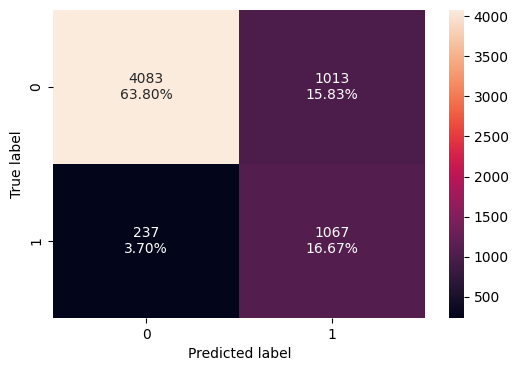

In [170]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

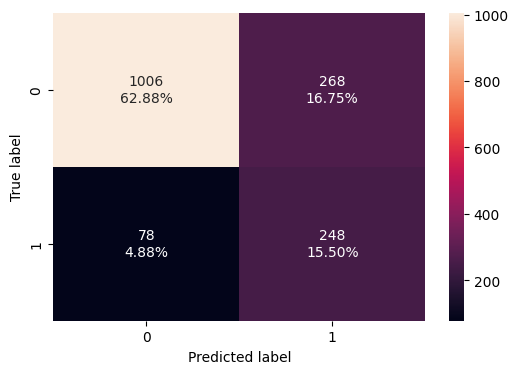

In [171]:
#Calculating the confusion matrix
make_confusion_matrix(y_valid,y_val_pred)

**Model_1:**

* There is an improvement in Recall compared to Model_0. Training recall is now ~80%, and validation recall is ~75%, indicating better identification of positive instances.

* The validation loss is  higher than the training loss.

### Neural Network with Adam Optimizer and Dropout

In [172]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [173]:
model_2 = Sequential()
# Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
# Adding dropout with a ratio of 0.2
model_2.add(Dropout(0.2))
# Adding a hidden layer with 64 neurons and relu as activation function
model_2.add(Dense(64, activation='relu'))
# Adding a hidden layer with 32 neurons and relu as activation function
model_2.add(Dense(32, activation='relu'))
# Adding dropout with a ratio of 0.1
model_2.add(Dropout(0.1))
# Adding a hidden layer with 16 neurons and relu as activation function
model_2.add(Dense(16, activation='relu'))
# Adding the output layer with 1 neuron and sigmoid as activation function (assuming binary classification)
model_2.add(Dense(1, activation='sigmoid'))

In [174]:
# Initialize the Adam optimizer with a learning rate of 0.001 for model training
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [175]:
# Compile the model with binary crossentropy loss, Adam optimizer accuracy as a metric
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [176]:
# Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [177]:
# Train the model on the training data (X_train, y_train) with validation on (X_valid, y_valid)
# Training runs for the specified number of epochs with a defined batch size. 'verbose=1' shows progress during training.
start = time.time()
history_2 = model_1.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=epochs, verbose=1)
end=time.time()

Epoch 1/25
100/100 [==============================] - 0s 908us/step - loss: 0.3098 - accuracy: 0.8684 - val_loss: 0.3601 - val_accuracy: 0.8519
Epoch 2/25
100/100 [==============================] - 0s 480us/step - loss: 0.3079 - accuracy: 0.8703 - val_loss: 0.3590 - val_accuracy: 0.8525
Epoch 3/25
100/100 [==============================] - 0s 468us/step - loss: 0.3075 - accuracy: 0.8711 - val_loss: 0.3593 - val_accuracy: 0.8556
Epoch 4/25
100/100 [==============================] - 0s 466us/step - loss: 0.3067 - accuracy: 0.8722 - val_loss: 0.3600 - val_accuracy: 0.8481
Epoch 5/25
100/100 [==============================] - 0s 453us/step - loss: 0.3065 - accuracy: 0.8708 - val_loss: 0.3663 - val_accuracy: 0.8512
Epoch 6/25
100/100 [==============================] - 0s 450us/step - loss: 0.3046 - accuracy: 0.8711 - val_loss: 0.3610 - val_accuracy: 0.8525
Epoch 7/25
100/100 [==============================] - 0s 458us/step - loss: 0.3035 - accuracy: 0.8723 - val_loss: 0.3602 - val_accuracy:

In [178]:
# Calculate and print the total time taken for training by subtracting the start time from the end time
print("Time taken in seconds", end - start)

Time taken in seconds 1.281810998916626


**Loss function**

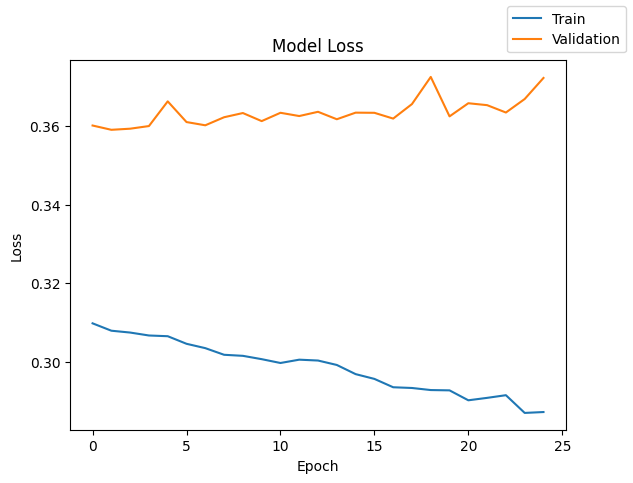

In [179]:
#Plotting Train Loss vs Validation Loss
plot(history_2,'loss')

**Finding the best threshold**

In [180]:
# predict probabilities
y_pred = model_2.predict(X_train)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

youden_index = tpr - fpr
max_youden_index = np.argmax(youden_index)

gmean = np.sqrt(tpr*(1-fpr))
max_gmean_index = np.argmax(gmean)
best_thresh = thresholds[max_gmean_index]
print('Best threshold using G-mean=%f'% (best_thresh))
print('Max G-mean value=%f'% (gmean[max_gmean_index]))
print("TPR value at the threshold=%f" % tpr[max_gmean_index])
print("FPR value at the threshold=%f" % fpr[max_gmean_index])
print("TNR value at the threshold=%f" % (1 - fpr[max_youden_index]))

200/200 [==============================] - 0s 286us/step
Best threshold using G-mean=0.492820
Max G-mean value=0.553324
TPR value at the threshold=0.584356
FPR value at the threshold=0.476060
TNR value at the threshold=0.523940


**Model_2 predecting by using the best threshold**

In [181]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > best_thresh)
y_train_pred

200/200 [==============================] - 0s 286us/step


array([[ True],
       [ True],
       [ True],
       ...,
       [False],
       [False],
       [ True]])

In [182]:
#Predicting the results using best as the threshold.
y_val_pred = model_2.predict(X_valid)
y_val_pred = (y_val_pred > best_thresh)
y_val_pred

50/50 [==============================] - 0s 315us/step


array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

**Metrics**

In [183]:
# Store recall scores for the model named "NN with Adam & Dropout" in the train and validation metric DataFrames
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_valid,y_val_pred)

**Classification report**

In [184]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.52      0.64      5096
           1       0.24      0.58      0.34      1304

    accuracy                           0.54      6400
   macro avg       0.53      0.55      0.49      6400
weighted avg       0.71      0.54      0.58      6400



In [185]:
#classification report
cr = classification_report(y_valid,y_val_pred) 
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.56      0.67      1274
           1       0.25      0.58      0.35       326

    accuracy                           0.57      1600
   macro avg       0.55      0.57      0.51      1600
weighted avg       0.72      0.57      0.61      1600



**Confusion matrix**

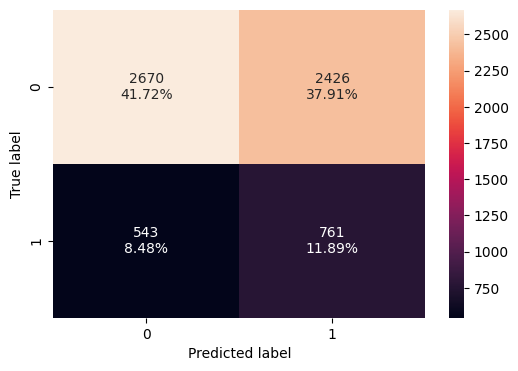

In [186]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

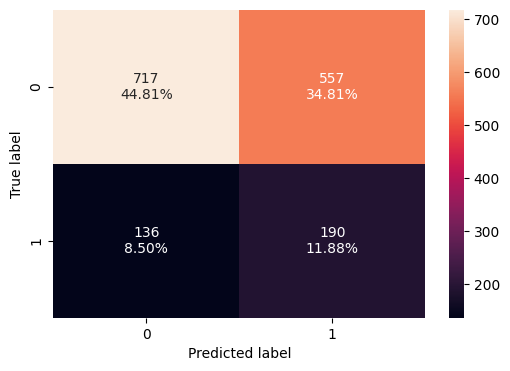

In [187]:
#Calculating the confusion matrix
make_confusion_matrix(y_valid,y_val_pred)

**Model_2:**

* Adding dropout layers seems to have worsened the model's performance.
* Training recall decreased to ~65%, and validation recall to ~66%,


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [188]:
sm  = SMOTE(random_state=42)
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



In [189]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [190]:
# Initializing the model
model_3 = Sequential()
# Adding the input layer with 32 neurons and ReLU activation function
model_3.add(Dense(32, activation='relu', input_dim=X_train_smote.shape[1]))
# Adding a hidden layer with 16 neurons and ReLU activation function
model_3.add(Dense(16, activation='relu'))
# Adding a hidden layer with 8 neurons and ReLU activation function
model_3.add(Dense(8, activation='relu'))
# Adding the output layer with 1 neuron and sigmoid activation function (assuming binary classification)
model_3.add(Dense(1, activation='sigmoid'))

In [191]:
# Initialize the SGD optimizer with a learning rate of 0.001 for model training
optimizer = tf.keras.optimizers.SGD(0.001)

In [192]:
# Compile the model with binary crossentropy loss, SGD optimizer, and accuracy as a metric
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [193]:
# Print a summary of the model's architecture, including layer details, output shapes, and parameter counts
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                384       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1057 (4.13 KB)
Trainable params: 1057 (4.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [194]:
start = time.time()
# Train the model on the SMOTE-processed training data (X_train_smote, y_train_smote) with validation on (X_valid, y_valid)
# Training runs for the specified number of epochs with a defined batch size. 'verbose=1' shows progress during training.
history_3 = model_3.fit(X_train_smote, y_train_smote,validation_data = (X_valid,y_valid), batch_size=batch_size,epochs=epochs,verbose=1)
end=time.time()

Epoch 1/25
160/160 [==============================] - 0s 805us/step - loss: 0.7039 - accuracy: 0.4931 - val_loss: 0.7387 - val_accuracy: 0.2369
Epoch 2/25
160/160 [==============================] - 0s 397us/step - loss: 0.7019 - accuracy: 0.4949 - val_loss: 0.7329 - val_accuracy: 0.2406
Epoch 3/25
160/160 [==============================] - 0s 401us/step - loss: 0.7002 - accuracy: 0.4998 - val_loss: 0.7277 - val_accuracy: 0.2519
Epoch 4/25
160/160 [==============================] - 0s 404us/step - loss: 0.6986 - accuracy: 0.5041 - val_loss: 0.7230 - val_accuracy: 0.2625
Epoch 5/25
160/160 [==============================] - 0s 435us/step - loss: 0.6972 - accuracy: 0.5062 - val_loss: 0.7188 - val_accuracy: 0.2756
Epoch 6/25
160/160 [==============================] - 0s 432us/step - loss: 0.6959 - accuracy: 0.5089 - val_loss: 0.7148 - val_accuracy: 0.2925
Epoch 7/25
160/160 [==============================] - 0s 427us/step - loss: 0.6946 - accuracy: 0.5143 - val_loss: 0.7109 - val_accuracy:

In [195]:
# Calculate and print the total time taken for training by subtracting the start time from the end time
print("Time taken in seconds", end - start)

Time taken in seconds 1.891427993774414


**Loss function**

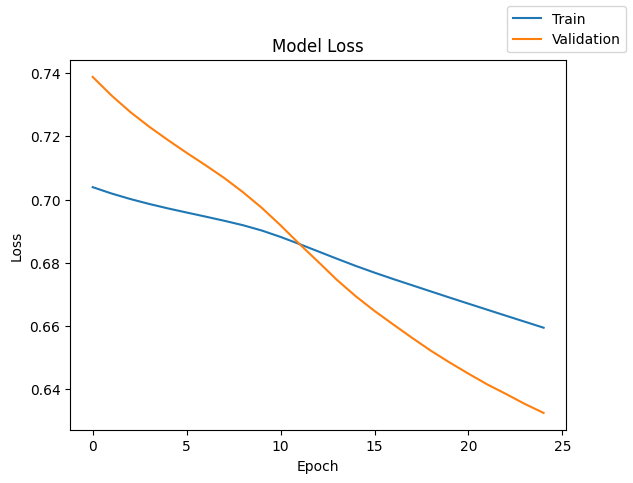

In [196]:
#Plotting Train Loss vs Validation Loss
plot(history_3, 'loss')

**Finding the best threshold**
* By using SMOTH we will use an 0.5 threshold as equal weight

In [197]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 0s 265us/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [198]:
y_val_pred = model_3.predict(X_valid)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 277us/step


array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

**Metrics**

In [199]:
# Store recall scores for the model named "NN with SMOTE & SGD" in the train and validation metric DataFrames
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_valid,y_val_pred)

**Classification report**

In [200]:
# Generate and print a classification report showing precision, recall, f1-score, and support for each class
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.63      0.64      0.63      5096
           1       0.63      0.62      0.62      5096

    accuracy                           0.63     10192
   macro avg       0.63      0.63      0.63     10192
weighted avg       0.63      0.63      0.63     10192



In [201]:
# Generate and print a classification report showing precision, recall, f1-score, and support for each class on the validation data
cr=classification_report(y_valid,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.63      0.73      1274
           1       0.30      0.62      0.41       326

    accuracy                           0.63      1600
   macro avg       0.59      0.63      0.57      1600
weighted avg       0.75      0.63      0.67      1600



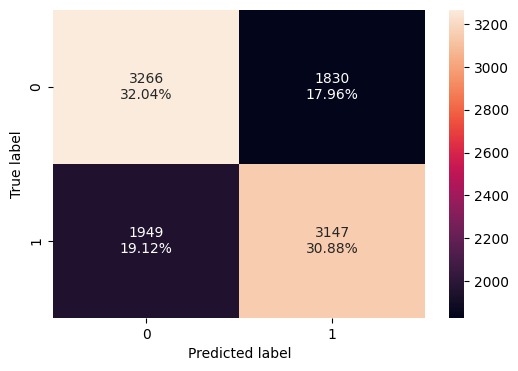

In [202]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

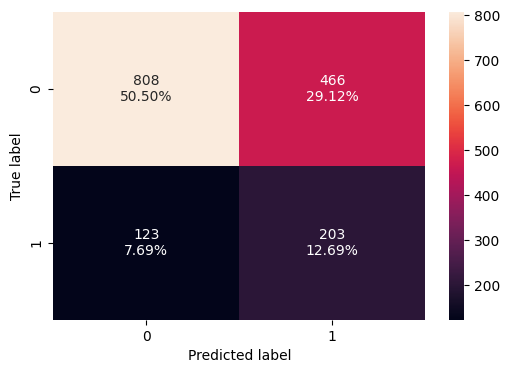

In [203]:
#Calculating the confusion matrix

make_confusion_matrix(y_valid,y_val_pred)

**Model_3:**

* Using SMOTE to balance the data and training with SGD optimizer resulted in a significant drop in recall scores.
* Training recall is now ~62%, and validation recall is ~62%, indicating a poor ability to identify positive instances.
* This suggests that simply balancing the data might not be the optimal solution, and other approaches might be needed to improve the model's performance.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [204]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [205]:
# Initializing the model
model_4 = Sequential()

# Add input layer (specify the number of neurons and activation function)
model_4.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))

# Add first hidden layer (specify the number of neurons and activation function)
model_4.add(Dense(32, activation='relu'))

# Add second hidden layer (specify the number of neurons and activation function)
model_4.add(Dense(16, activation='relu'))

# Add the output layer
# For binary classification, the output layer has 1 neuron with a 'sigmoid' activation function
# For multi-class classification, use softmax and specify the number of classes in the Dense layer
model_4.add(Dense(1, activation='sigmoid'))

In [206]:
# Initialize the Adam optimizer with a learning rate of 0.001 for model training
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [207]:
# Compile the model with binary crossentropy loss, Adam optimizer, and recall as a metric
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [208]:
# Print a summary of the model's architecture, including layer types, output shapes, and the number of parameters
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3393 (13.25 KB)
Trainable params: 3393 (13.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [209]:
start = time.time()
# Train the model on the SMOTE-processed training data (X_train_smote, y_train_smote) with validation on (X_valid, y_valid)
# The training process runs for the specified number of epochs with a defined batch size. 'verbose=1' displays progress during training.
history_4 = model_4.fit(X_train_smote, y_train_smote,validation_data=(X_valid, y_valid),batch_size=batch_size,epochs=epochs,verbose=1)
end=time.time()

Epoch 1/25
160/160 [==============================] - 0s 906us/step - loss: 0.5790 - accuracy: 0.7091 - val_loss: 0.5698 - val_accuracy: 0.7056
Epoch 2/25
160/160 [==============================] - 0s 447us/step - loss: 0.5102 - accuracy: 0.7525 - val_loss: 0.5164 - val_accuracy: 0.7500
Epoch 3/25
160/160 [==============================] - 0s 458us/step - loss: 0.4750 - accuracy: 0.7746 - val_loss: 0.5178 - val_accuracy: 0.7412
Epoch 4/25
160/160 [==============================] - 0s 438us/step - loss: 0.4559 - accuracy: 0.7868 - val_loss: 0.4647 - val_accuracy: 0.7781
Epoch 5/25
160/160 [==============================] - 0s 437us/step - loss: 0.4382 - accuracy: 0.7999 - val_loss: 0.4892 - val_accuracy: 0.7656
Epoch 6/25
160/160 [==============================] - 0s 432us/step - loss: 0.4256 - accuracy: 0.8055 - val_loss: 0.4762 - val_accuracy: 0.7788
Epoch 7/25
160/160 [==============================] - 0s 435us/step - loss: 0.4141 - accuracy: 0.8133 - val_loss: 0.4691 - val_accuracy:

In [210]:
# Calculate and print the total time taken for training by subtracting the start time from the end time
print("Time taken in seconds", end - start)

Time taken in seconds 2.1344141960144043


**Loss function**

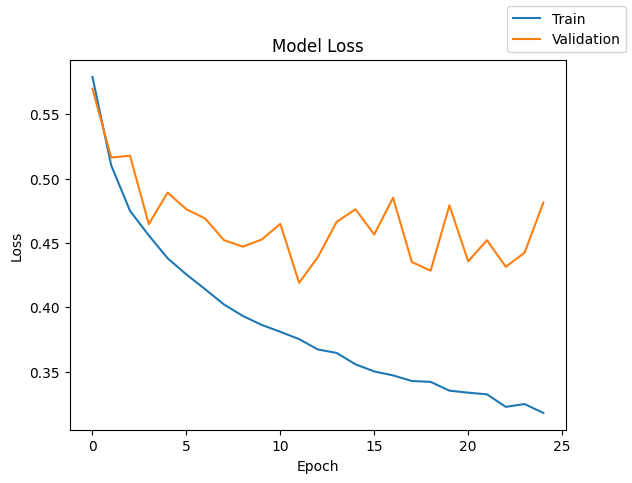

In [211]:
#Plotting Train Loss vs Validation Loss
plot(history_4, 'loss')

**Finding the best threshold**
* By using SMOTH we will use an 0.5 threshold as equal weight

In [212]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 [==============================] - 0s 264us/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [213]:
y_val_pred = model_4.predict(X_valid)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 [==============================] - 0s 275us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

**Metrics**

In [214]:
model_name = "NN with SMOTE & Adam"
# Store recall scores for the model named "NN with SMOTE & Adam" in the train and validation metric DataFrames
train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_valid,y_val_pred)

**Classification report**

In [215]:
# Generate and print a classification report showing precision, recall, f1-score, and support for each class on the SMOTE-processed training data
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5096
           1       0.86      0.89      0.87      5096

    accuracy                           0.87     10192
   macro avg       0.87      0.87      0.87     10192
weighted avg       0.87      0.87      0.87     10192



In [216]:
# Generate and print a classification report showing precision, recall, f1-score, and support for each class on the validation data
cr = classification_report(y_valid, y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.82      0.86      1274
           1       0.49      0.66      0.56       326

    accuracy                           0.79      1600
   macro avg       0.70      0.74      0.71      1600
weighted avg       0.82      0.79      0.80      1600



**Confusion matrix**

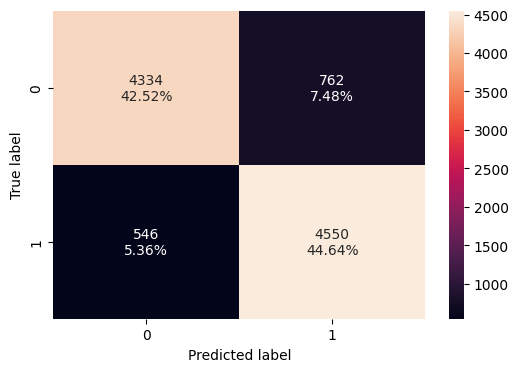

In [217]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

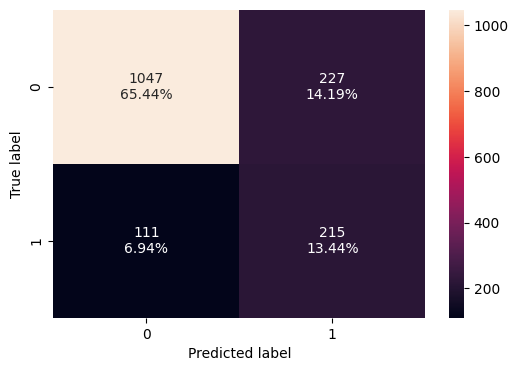

In [218]:
#Calculating the confusion matrix
make_confusion_matrix(y_valid,y_val_pred) 

**Model_4:**

* Using SMOTE to balance the data and training with the Adam optimizer improved recall scores compared to the SGD optimizer (Model_3).
* Training recall is now ~90%, and validation recall is ~72%, indicating a better ability to identify positive instances.
* However, there's still room for improvement, as the validation recall is lower than the training recall, suggesting potential overfitting.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [219]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [220]:
# Initializing the model
model_5 = Sequential()

# Add input layer with the required number of neurons and relu as the activation function
model_5.add(Dense(64, activation='relu', input_dim=X_train_smote.shape[1]))

# Add dropout rate after the input layer
model_5.add(Dropout(0.5))

# Add hidden layer with the required number of neurons and an activation function
model_5.add(Dense(32, activation='relu'))

# Add dropout rate after the hidden layer
model_5.add(Dropout(0.5))

# Adding another hidden layer with 8 neurons and relu as activation function
model_5.add(Dense(8, activation='relu'))

# Add the output layer with the required number of neurons and a suitable activation function
# For binary classification, use 1 neuron with a sigmoid activation function
model_5.add(Dense(1, activation='sigmoid'))

In [221]:
# Initialize the Adam optimizer with a learning rate of 0.001 for model training
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [222]:
# Compile the model with cross-entropy loss, Adam optimizer, and recall as a metric
model_5.compile(loss='crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [223]:
# Print a summary of the model's architecture, including details about each layer, output shapes, and the number of parameters
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 264       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3121 (12.19 KB)
Trainable params: 3121 (12

In [224]:
start=time.time()
# Train the model on the SMOTE-processed training data (X_train_smote, y_train_smote) with validation on (X_valid, y_valid)
# The training process will run for the specified number of epochs with a defined batch size. 'verbose=1' displays progress during training.
history_5 = model_5.fit(X_train_smote, y_train_smote,validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=epochs, verbose=1)
end=time.time()

Epoch 1/25


ValueError: in user code:

    File "/Users/mohammadreza/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/Users/mohammadreza/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/mohammadreza/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/Users/mohammadreza/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/mohammadreza/.local/lib/python3.11/site-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/Users/mohammadreza/.local/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 252, in __call__
        self.build(y_pred)
    File "/Users/mohammadreza/.local/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 194, in build
        self._losses = tf.nest.map_structure(
    File "/Users/mohammadreza/.local/lib/python3.11/site-packages/keras/src/engine/compile_utils.py", line 365, in _get_loss_object
        loss = losses_mod.get(loss)
    File "/Users/mohammadreza/.local/lib/python3.11/site-packages/keras/src/losses.py", line 2965, in get
        return deserialize(identifier, use_legacy_format=use_legacy_format)
    File "/Users/mohammadreza/.local/lib/python3.11/site-packages/keras/src/losses.py", line 2912, in deserialize
        return legacy_serialization.deserialize_keras_object(
    File "/Users/mohammadreza/.local/lib/python3.11/site-packages/keras/src/saving/legacy/serialization.py", line 537, in deserialize_keras_object
        raise ValueError(

    ValueError: Unknown loss function: 'crossentropy'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.


In [ ]:
# Calculate and print the total time taken for training by subtracting the start time from the end time
print("Time taken in seconds", end - start)

Time taken in seconds 2.0844688415527344


**Loss function**

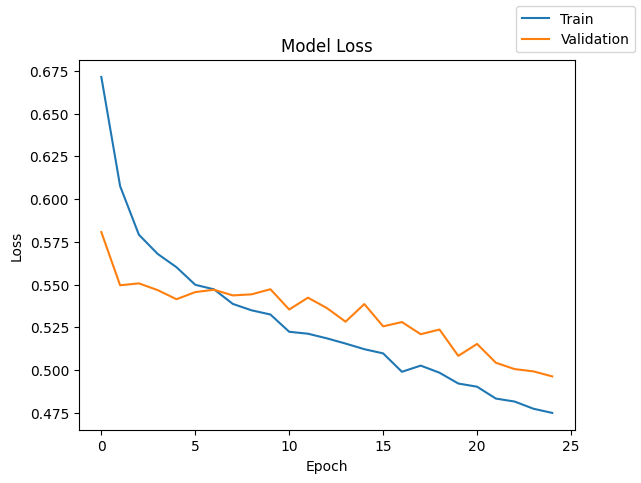

In [ ]:
#Plotting Train Loss vs Validation Loss
plot(history_5, 'loss')

**Finding the best threshold**
* By susing SMOTE we weill use the equal threshold for both classes

In [ ]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 235us/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_valid)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

**Metrics**

In [ ]:
# Store recall scores for the model named "NN with SMOTE, Adam & Dropout" in the train and validation metric DataFrames

model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_valid,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      5096
           1       0.79      0.83      0.81      5096

    accuracy                           0.80     10192
   macro avg       0.80      0.80      0.80     10192
weighted avg       0.80      0.80      0.80     10192



In [ ]:
#classification report
cr=classification_report(y_valid,y_val_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1274
           1       0.45      0.73      0.55       326

    accuracy                           0.76      1600
   macro avg       0.68      0.75      0.70      1600
weighted avg       0.82      0.76      0.78      1600



**Confusion matrix**

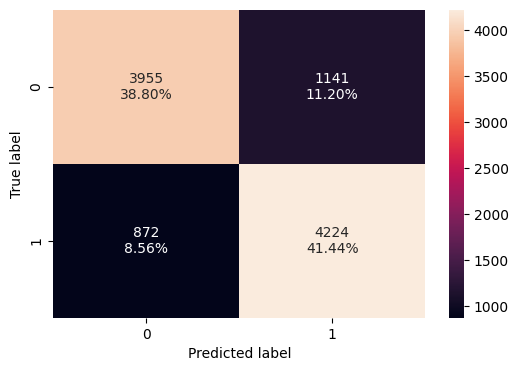

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

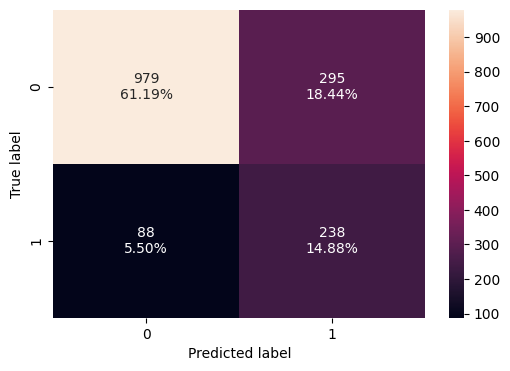

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_valid,y_val_pred)

**Model_5:**

* Training recall is now ~83%, and validation recall is around 73%.

## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.596626
NN with Adam,0.802914
NN with Adam & Dropout,0.653374
NN with SMOTE & SGD,0.620094
NN with SMOTE & Adam,0.902669
"NN with SMOTE,Adam & Dropout",0.828885


In [ ]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.573620
NN with Adam,0.748466
NN with Adam & Dropout,0.656442
NN with SMOTE & SGD,0.622699
NN with SMOTE & Adam,0.723926
"NN with SMOTE,Adam & Dropout",0.730061


In [ ]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.023006
NN with Adam,0.054448
NN with Adam & Dropout,-0.003067
NN with SMOTE & SGD,-0.002605
NN with SMOTE & Adam,0.178742
"NN with SMOTE,Adam & Dropout",0.098824


**Best Model**

The best model with Recall score is model_1(Neural Network With Adam) which will predict the test data that
this model has the highest score on validation and between NN with SMOTE, Adam & Dropout and NN with SMOTE & Adam has less differentiate so it generalizes better. Although those two are really well. we should select just one model. 

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
best_model = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
best_model.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# Adding a hidden layer with 32 neurons and relu as activation function
best_model.add(Dense(32, activation='relu'))
# Adding the output layer with the number of neurons required (assuming binary classification)
best_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# Initialize the Adam optimizer with a learning rate of 0.001 for model training
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
# Compile the model with binary crossentropy loss, Adam optimizer, and accuracy as a metric
best_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Print a summary of the model's architecture, including layer details, output shapes, and parameter counts
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Record the current time before training starts
start = time.time()
# Train the model on the training data (X_train, y_train) with validation on (X_valid, y_valid)
# Training runs for the specified number of epochs with a defined batch size. 'verbose=1' displays progress during training.
best_history = best_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=batch_size, epochs=epochs, verbose=1)
# Record the time after training ends
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.7722 - loss: 0.5181 - val_accuracy: 0.8044 - val_loss: 0.4357
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.8129 - loss: 0.4230 - val_accuracy: 0.8138 - val_loss: 0.4257
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8259 - loss: 0.4087 - val_accuracy: 0.8188 - val_loss: 0.4183
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - accuracy: 0.8289 - loss: 0.3982 - val_accuracy: 0.8281 - val_loss: 0.4112
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.8340 - loss: 0.3889 - val_accuracy: 0.8331 - val_loss: 0.4044
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 351us/step - accuracy: 0.8378 - loss: 0.3804 - val_accuracy: 0.8331 - val_loss: 0.3988
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - accuracy: 0.8433 - loss: 0.3730 - val_accuracy: 0.8375 - val_loss: 0.3934
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 356us/step - accuracy: 0.8450 - loss: 0.3663 - 

In [ ]:
# Calculate and print the total time taken for training by subtracting the start time from the end time
print("Time taken in seconds", end - start)

Time taken in seconds 1.4129478931427002


**Loss function**

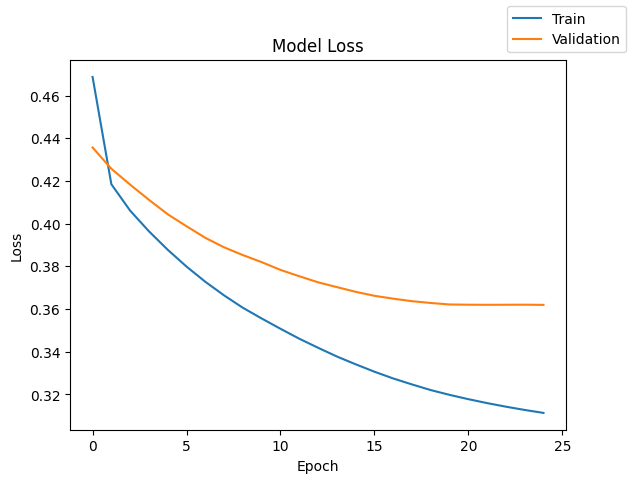

In [ ]:
#Plotting Train Loss vs Validation Loss
plot(best_history,'loss')

**Finding the best threshold**

In [ ]:
# predict probabilities
y_pred = best_model.predict(X_train)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 0]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_train, y_pred)

youden_index = tpr - fpr
max_youden_index = np.argmax(youden_index)

gmean = np.sqrt(tpr*(1-fpr))
max_gmean_index = np.argmax(gmean)
best_thresh = thresholds[max_gmean_index]
print('Best threshold using G-mean=%f'% (best_thresh))
print('Max G-mean value=%f'% (gmean[max_gmean_index]))
print("TPR value at the threshold=%f" % tpr[max_gmean_index])
print("FPR value at the threshold=%f" % fpr[max_gmean_index])
print("TNR value at the threshold=%f" % (1 - fpr[max_youden_index]))

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step
Best threshold using G-mean=0.208913
Max G-mean value=0.808615
TPR value at the threshold=0.803681
FPR value at the threshold=0.186421
TNR value at the threshold=0.813579


**Model_0 predecting by using the best threshold**

In [ ]:
#Predicting the results using best threshold
y_test_pred = model_1.predict(X_test)
y_test_pred = (y_test_pred> best_thresh)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step


In [ ]:
#lets print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1593
           1       0.49      0.72      0.58       407

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



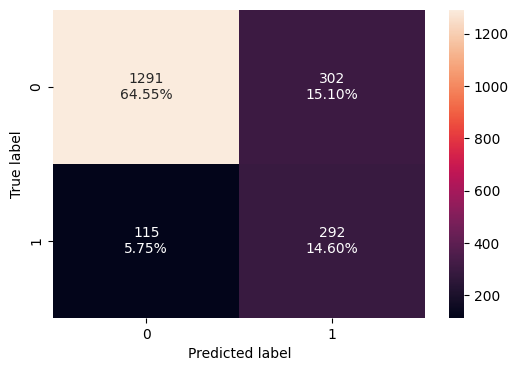

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

* Recall on test data is ~72% which shows the performance is close to the validation score.

## Actionable Insights and Business Recommendations

**Actionable Insights and Business Recommendations**

**1. Focus on High-Risk Customers:**

* The model demonstrates a good ability to identify customers at high risk of churn. 
* Prioritize retention efforts and targeted interventions for these customers to maximize impact.

**2. Personalized Retention Strategies:**

* Leverage customer data and insights to develop personalized retention strategies. 
* Consider offering tailored incentives, discounts, or loyalty programs to high-risk customers.

**3. Proactive Communication:**

* Implement proactive communication strategies to engage with customers who exhibit early signs of churn. 
* This could include personalized emails, targeted offers, or proactive customer support outreach.

**4. Continuous Model Improvement:**

* Regularly monitor and evaluate the model's performance to ensure its effectiveness. 
* Explore opportunities to enhance the model by incorporating additional data sources or refining feature engineering techniques.

**5. Address Root Causes of Churn:**

* Analyze the factors contributing to churn identified by the model (e.g., specific product features, pricing, customer service interactions). 
* Implement targeted improvements to address these root causes and enhance overall customer satisfaction.



